# **Business Case: Delhivery - Feature Engineering**



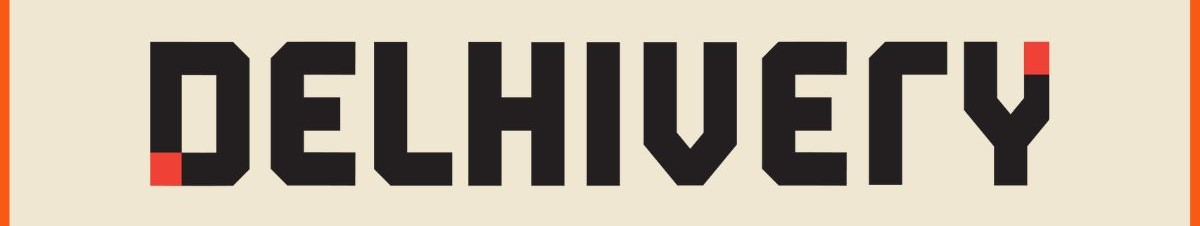

## **🔮Introduction**  

###🚚 **About Delhivery**

**Delhivery** is a leading Indian logistics service provider that has revolutionized the country's delivery and supply chain industry. Founded in 2010, the company has rapidly expanded its operations to reach a vast network across India, offering a comprehensive suite of logistics solutions.

Delhivery's core services include:

* **Express Delivery:** Providing fast and reliable delivery services for various packages and products.
* **Reverse Logistics:** Handling returns and exchanges for e-commerce businesses.
* **Supply Chain Solutions:** Offering end-to-end supply chain management services, including warehousing, transportation, and distribution.
* **Cross-Border Logistics:** Facilitating international shipping and logistics operations.

With its extensive network, advanced technology, and commitment to customer satisfaction, Delhivery has become a trusted partner for businesses of all sizes, from e-commerce giants to small and medium enterprises.


###🎯 **Objective**

The company wants to understand and process the data coming out of data engineering pipelines:

* Clean, sanitize and manipulate data to get useful features out of raw fields

* Make sense out of the raw data and help the data science team to build forecasting models on it

###📂 **Dataset**

The provided dataset (`delhivery_data.csv`) holds valuable information about package deliveries, including trip details, time taken, distances, and route information.

###🗃️ **Features of the dataset.**

| Feature     | Description                                                                 |
|:------------|:----------------------------------------------------------------------------|
| data                         | Tells whether the data is testing or training data                          |
| trip_creation_time           | Timestamp of trip creation                                                  |
| route_schedule_uuid          | Unique Id for a particular route schedule                                   |
| route_type                   | Transportation type                                                         |
| FTL                          | Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way |
| Carting                      | Handling system consisting of small vehicles (carts)                        |
| trip_uuid                    | Unique ID given to a particular trip (A trip may include different source and destination centers) |
| source_center                | Source ID of trip origin                                                    |
| source_name                  | Source Name of trip origin                                                  |
| destination_cente            | Destination ID                                                              |
| destination_name             | Destination Name                                                            |
| od_start_time                | Trip start time                                                             |
| od_end_time                  | Trip end time                                                               |
| start_scan_to_end_scan       | Time taken to deliver from source to destination                            |
| is_cutoff                    | Unknown field                                                               |
| cutoff_factor                | Unknown field                                                               |
| cutoff_timestamp             | Unknown field                                                               |
| actual_distance_to_destination | Distance in Kms between source and destination warehouse                   |
| actual_time                  | Actual time taken to complete the delivery (Cumulative)                     |
| osrm_time                    | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
| osrm_distance                | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
| factor                       | Unknown field                                                               |
| segment_actual_time          | This is a segment time. Time taken by the subset of the package delivery     |
| segment_osrm_time            | This is the OSRM segment time. Time taken by the subset of the package delivery |
| segment_osrm_distance        | This is the OSRM distance. Distance covered by subset of the package delivery |
| segment_factor               | Unknown field                                                               |



###**📚 Import Necessary Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import levene
from scipy.stats import probplot
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import boxcox, shapiro, anderson
import statsmodels.api as sm
import missingno as msno
import warnings
import re
warnings.filterwarnings('ignore')

###**📂 Loading the Dataset:**

In [ ]:
# Download the data
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery_data.csv -q --show-progress

delhivery_data.csv  100%[===================>]  53.04M   116MB/s    in 0.5s    


###**🧭 Exploring the Dataset:**

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("delhivery_data.csv")

# Display the first few rows of the DataFrame
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# The number of rows and columns given in the dataset
df.shape

(144867, 24)

In [ ]:
# The characteristics of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Dropping unknown fields

df = df.drop(columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'])

In [ ]:
df.shape

(144867, 19)

##**1.🕵️‍♂️ Basic data cleaning and exploration:**





**1.1 Handle missing values in the data.**

In [ ]:
# Check for the missing values and find the number of missing values in each column
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
for i in missing_source_name:
    unique_source_name = df.loc[df['source_center'] == i, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print("Source Center :", i, "-" * 7, "Source Name :", 'Not Found')
    else :
        print("Source Center :", i, "-" * 7, "Source Name :", unique_source_name)

Source Center : IND342902A1B ------- Source Name : Not Found
Source Center : IND577116AAA ------- Source Name : Not Found
Source Center : IND282002AAD ------- Source Name : Not Found
Source Center : IND465333A1B ------- Source Name : Not Found
Source Center : IND841301AAC ------- Source Name : Not Found
Source Center : IND509103AAC ------- Source Name : Not Found
Source Center : IND126116AAA ------- Source Name : Not Found
Source Center : IND331022A1B ------- Source Name : Not Found
Source Center : IND505326AAB ------- Source Name : Not Found
Source Center : IND852118A1B ------- Source Name : Not Found


In [ ]:
for i in missing_destination_name:
    unique_destination_name = df.loc[df['destination_center'] == i, 'destination_name'].unique()
    if (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Destination Center :", i, "-" * 7, "Destination Name :", 'Not Found')
    else :
        print("Destination Center :", i, "-" * 7, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ------- Destination Name : Not Found
Destination Center : IND577116AAA ------- Destination Name : Not Found
Destination Center : IND282002AAD ------- Destination Name : Not Found
Destination Center : IND465333A1B ------- Destination Name : Not Found
Destination Center : IND841301AAC ------- Destination Name : Not Found
Destination Center : IND505326AAB ------- Destination Name : Not Found
Destination Center : IND852118A1B ------- Destination Name : Not Found
Destination Center : IND126116AAA ------- Destination Name : Not Found
Destination Center : IND509103AAC ------- Destination Name : Not Found
Destination Center : IND221005A1A ------- Destination Name : Not Found
Destination Center : IND250002AAC ------- Destination Name : Not Found
Destination Center : IND331001A1C ------- Destination Name : Not Found
Destination Center : IND122015AAC ------- Destination Name : Not Found


In [ ]:
# The IDs for which the source name is missing, are all those IDs for destination also missing ?
np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

False

In [ ]:
df.source_name.value_counts()

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),23347
Bangalore_Nelmngla_H (Karnataka),9975
Bhiwandi_Mankoli_HB (Maharashtra),9088
Pune_Tathawde_H (Maharashtra),4061
Hyderabad_Shamshbd_H (Telangana),3340
...,...
Shahjhnpur_NavdaCln_D (Uttar Pradesh),1
Soro_UttarDPP_D (Orissa),1
Kayamkulam_Bhrnikvu_D (Kerala),1


In [ ]:
df.destination_name.value_counts()

,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),15192
Bangalore_Nelmngla_H (Karnataka),11019
Bhiwandi_Mankoli_HB (Maharashtra),5492
Hyderabad_Shamshbd_H (Telangana),5142
Kolkata_Dankuni_HB (West Bengal),4892
...,...
Hyd_Trimulgherry_Dc (Telangana),1
Vijayawada (Andhra Pradesh),1
Baghpat_Barout_D (Uttar Pradesh),1


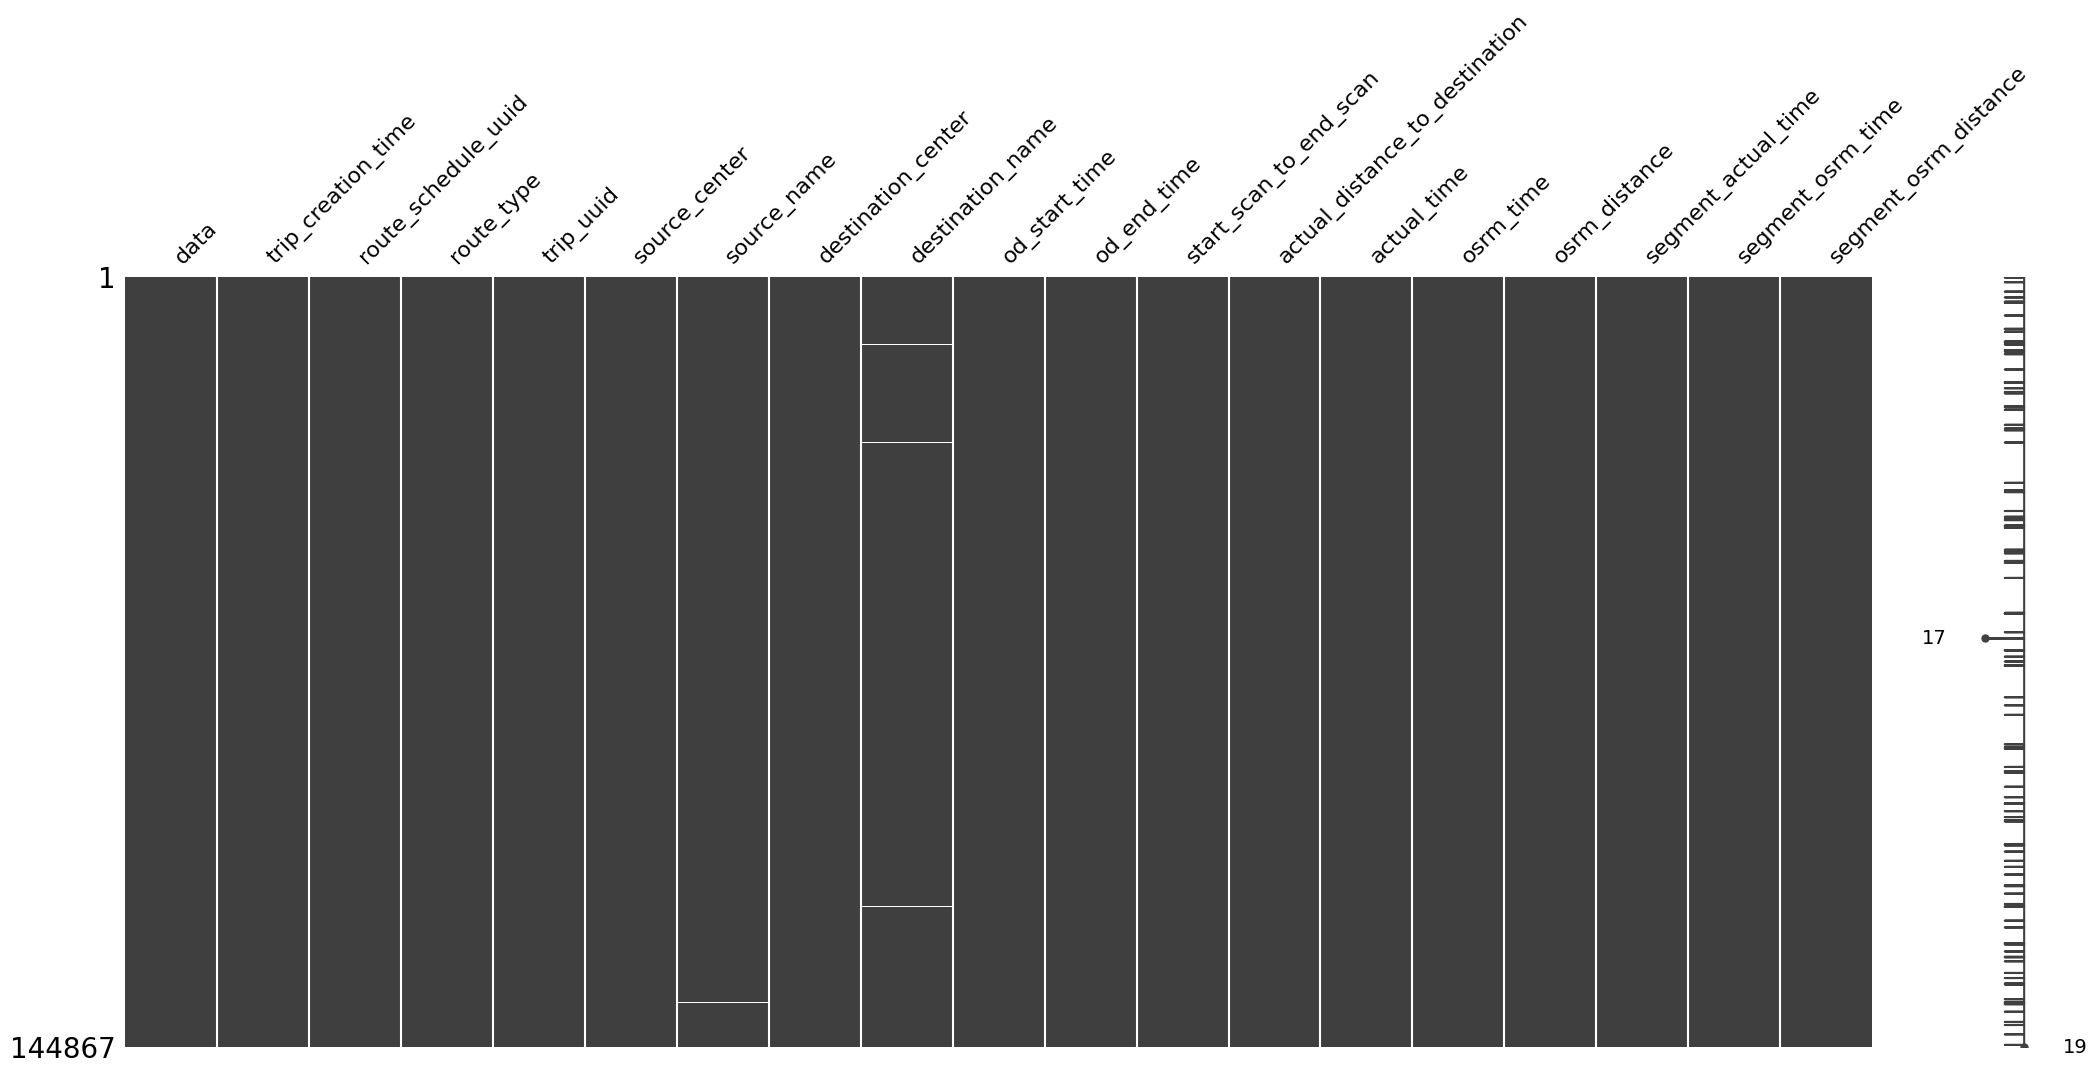

In [ ]:
#graphical represnation of null values
msno.matrix(df)
plt.show()

In [ ]:
# Calculate the percentage of missing values for 'source_name'
source_name_missing_percentage = (df['source_name'].isnull().sum() / len(df)) * 100

# Calculate the percentage of missing values for 'destination_name'
destination_name_missing_percentage = (df['destination_name'].isnull().sum() / len(df)) * 100

print(f"Percentage of missing values for 'source_name': {source_name_missing_percentage:.2f}%")
print(f"Percentage of missing values for 'destination_name': {destination_name_missing_percentage:.2f}%")


Percentage of missing values for 'source_name': 0.20%
Percentage of missing values for 'destination_name': 0.18%


### **🔍 Insights**

*  After analyzing the missing values in the `source_name` and `destination_name` columns, we determined that **imputing default values would not significantly improve the data quality.** Given the relatively low percentage of missing data (0.20% and 0.18%, respectively), **removing rows containing null values is a viable option.**

*  This approach ensures that our analysis and modeling are based on complete and accurate data, **reducing the risk of introducing biases or inaccuracies due to missing information.** However, it's important to consider the specific context and goals of the analysis to determine if alternative strategies, such as imputation or further investigation, might be more appropriate.


In [ ]:
# Drop rows with missing values in 'source_name' and 'destination_name'
df = df.dropna(subset=['source_name', 'destination_name'])

In [ ]:
df.isna().sum().any()

False

In [ ]:
df.shape

(144316, 19)

**1.2 Converting time columns into pandas datetime.**


In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [ ]:
#checking the unique values for columns
df.nunique()

,0
data,2
trip_creation_time,14787
route_schedule_uuid,1497
route_type,2
trip_uuid,14787
source_center,1496
source_name,1496
destination_center,1466
destination_name,1466
od_start_time,26223


In [ ]:
# prompt: #checking the unique values for columns

for column in df.columns:
  print(f"Unique values for {column}: \n{df[column].unique()}")
  print('-'*100)

Unique values for data: 
['training' 'test']
----------------------------------------------------------------------------------------------------
Unique values for trip_creation_time: 
['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']
----------------------------------------------------------------------------------------------------
Unique values for route_schedule_uuid: 
['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e08be79-8a4c-4a91-a514-5350403c0e31'
 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c150996']
----------------------------------------------------------------------------------------------------
Unique values for route_type: 
['Carting' 'FTL']
-------

### **🔍 Insights**

1.  Time Columns **(trip_creation_time, od_start_time, od_end_time, cutoff_timestamp)**:

  - These columns should be converted to pandas datetime objects to facilitate time-based analysis and calculations.

2.    Categorical Columns **(data, route_type):**
   - These columns should be treated as categorical variables as they only have 2 values.

3. Float64 Columns **(actual_distance_to_destination, start_scan_to_end_scan, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance)**:
    - These columns store numerical data representing distance and time.
    - We can consider changing the datatype to float32 to reduce memory usage, as the precision of float64 might be excessive for our analysis.


In [ ]:
# datatype changes for time columns into pandas datetime.
for column in ['trip_creation_time', 'od_start_time', 'od_end_time']:
  df[column] = pd.to_datetime(df[column])

In [ ]:
# Convert float64 to float32

for column in ['actual_distance_to_destination', 'start_scan_to_end_scan', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']:
  df[column] = pd.to_numeric(df[column], downcast='float')

In [ ]:
# Convert categorical columns to category dtype
for column in ['data', 'route_type']:
  df[column] = df[column].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

### **🔍 Insights**

*  The dataset’s memory usage has been significantly optimized, decreasing from over 25.6 MB to just 15.7 MB. This represents an impressive reduction of approximately 38.67%.

**1.3 Analyze structure & characteristics of the dataset.**

In [ ]:
# Descriptive statistics for numerical features
numerical_features = df.select_dtypes(include=np.number)
numerical_features.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697571,234.708496,417.996216,214.437042,285.549805,36.175381,18.495697,22.818995
std,1038.097290,345.474426,598.951843,308.438782,421.714020,53.519287,14.768377,17.865715
min,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,451.000000,66.135319,132.000000,64.000000,78.624401,28.000000,17.000000,23.508301
75%,1645.000000,286.919304,516.000000,259.000000,346.305397,40.000000,22.000000,27.813324
max,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809


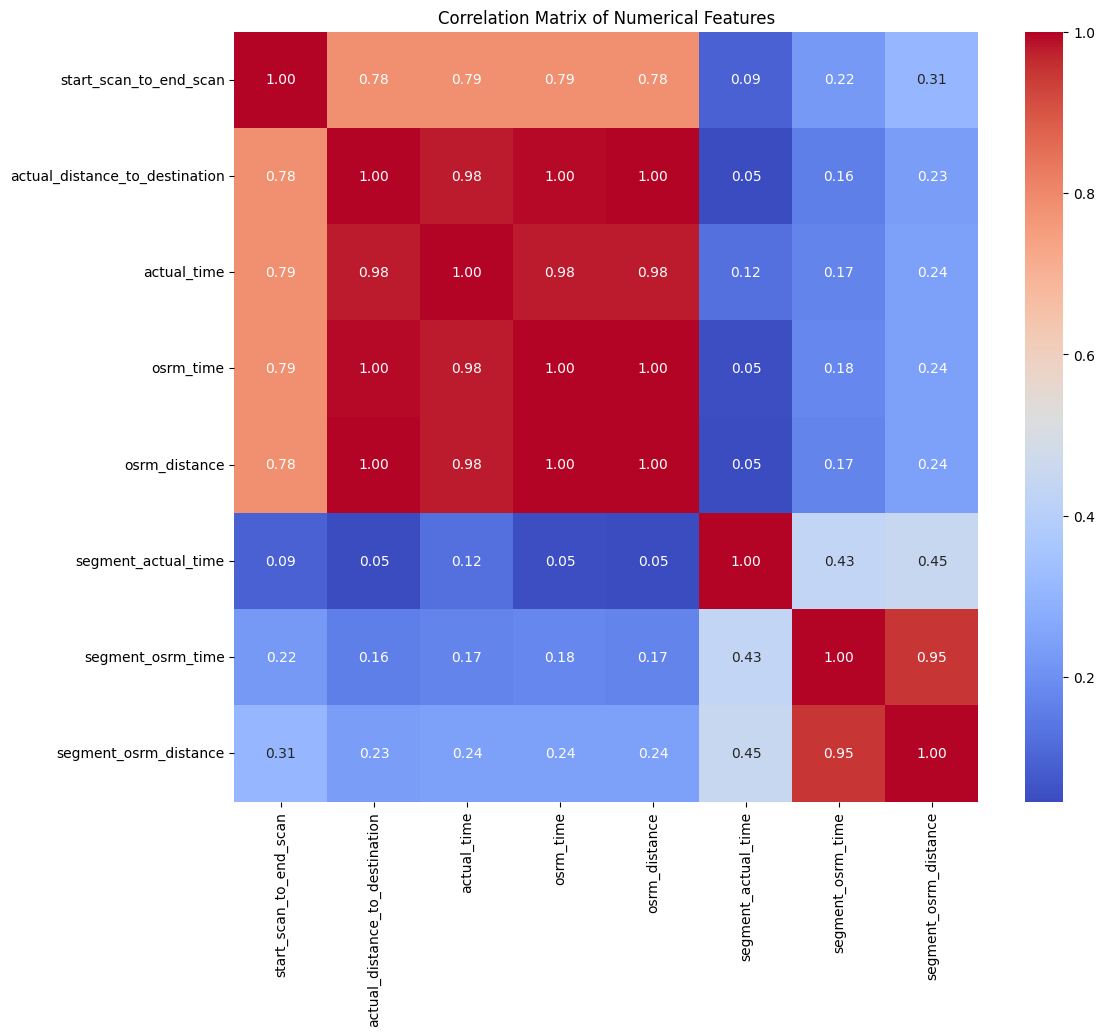

In [ ]:
# Correlation matrix for numerical features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

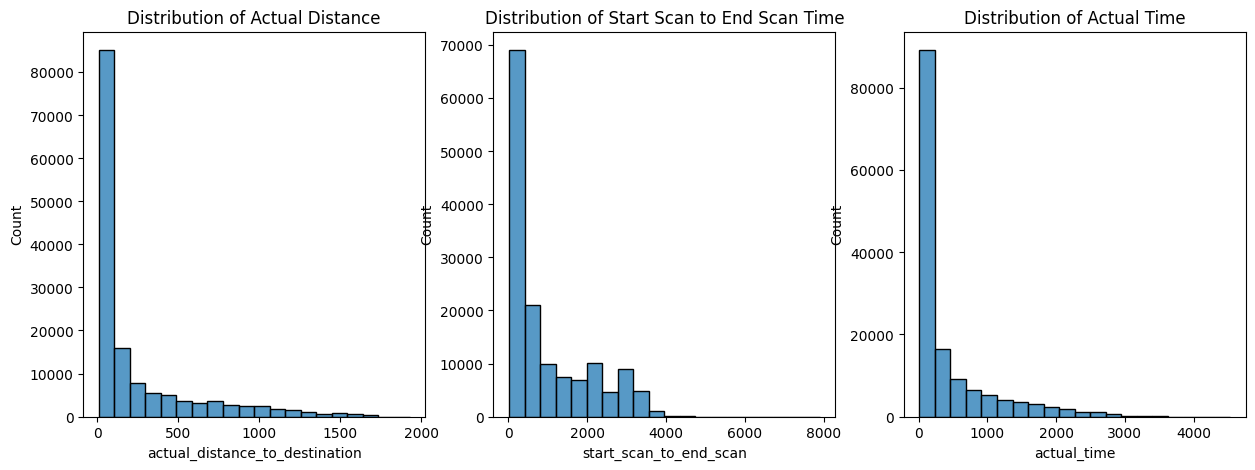

In [ ]:
# Distribution of key features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['actual_distance_to_destination'], bins=20)
plt.title('Distribution of Actual Distance')

plt.subplot(1, 3, 2)
sns.histplot(df['start_scan_to_end_scan'], bins=20)
plt.title('Distribution of Start Scan to End Scan Time')

plt.subplot(1, 3, 3)
sns.histplot(df['actual_time'], bins=20)
plt.title('Distribution of Actual Time')
plt.show()

In [ ]:
# Unique values for categorical features
for column in df.select_dtypes(include=['category']):
    print(f"Unique values for {column}: {df[column].unique()}")

Unique values for data: ['training', 'test']
Categories (2, object): ['test', 'training']
Unique values for route_type: ['Carting', 'FTL']
Categories (2, object): ['Carting', 'FTL']


### **🔍 Insights**

* **Correlation Analysis:**
  - The correlation matrix reveals strong positive correlations between `actual_time`, `osrm_time`, `segment_actual_time`, and `segment_osrm_time`. This indicates that these features are highly related, as expected, as the total delivery time is influenced by the time taken for individual segments.
  - Similarly, `actual_distance_to_destination` and `osrm_distance` show a strong positive correlation.
  - Understanding these correlations is important for feature selection and model building, as highly correlated features can lead to multicollinearity issues.

* **Distribution Analysis:**
  - The distributions of `actual_distance_to_destination`, `start_scan_to_end_scan`, and `actual_time` show that most deliveries are within a specific range of distances and times, which is important to understand the general operational pattern.
  - The presence of some outliers can be observed in the distributions, which can either be due to unusual delivery circumstances or potentially errors.  

* **Categorical Features:**
  - The 'data' feature tells us whether it's test data or train data.
  - The 'route_type' has two values which are mainly 'FTL' and 'Carting'

These insights provide a preliminary understanding of the dataset, which will guide us in further analyses, such as outlier treatment, feature engineering, and model building.

# 🛠 **2. Merging Rows and Aggregating by Segment**

### 🔗 **2.1 Grouping by segment**

In [ ]:
# Creating a unique identifier for each segment of a trip
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'].astype(str) + '_' + df['destination_center']

In [ ]:
# Calculate cumulative sum of segment_actual_time, segment_osrm_distance, and segment_osrm_time within each segment
segment_columns = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df[ [col + '_sum' for col in segment_columns]] = df.groupby('segment_key')[segment_columns].cumsum()

In [ ]:
df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']].head(10)

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,14.0,11.9653,11.965300,11.0,11.0
1,trip-153741093647649320_IND388121AAA_IND388620AAB,10.0,24.0,9.7590,21.724300,9.0,20.0
2,trip-153741093647649320_IND388121AAA_IND388620AAB,16.0,40.0,10.8152,32.539497,7.0,27.0
3,trip-153741093647649320_IND388121AAA_IND388620AAB,21.0,61.0,13.0224,45.561897,12.0,39.0
4,trip-153741093647649320_IND388121AAA_IND388620AAB,6.0,67.0,3.9153,49.477200,5.0,44.0
5,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,15.0,12.1171,12.117100,11.0,11.0
6,trip-153741093647649320_IND388620AAB_IND388320AAA,28.0,43.0,9.1719,21.289000,6.0,17.0
7,trip-153741093647649320_IND388620AAB_IND388320AAA,21.0,64.0,14.5362,35.825199,11.0,28.0
8,trip-153741093647649320_IND388620AAB_IND388320AAA,10.0,74.0,11.3648,47.189999,10.0,38.0
9,trip-153741093647649320_IND388620AAB_IND388320AAA,26.0,100.0,6.0434,53.233398,6.0,44.0


###➕ **2.2 Aggregating at segment level**

In [ ]:
# Creating a dictionary for aggregation at segment level

create_segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

In [ ]:
# Group by segment_key and aggregate
df_segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()

In [ ]:
# Sort by segment_key and od_end_time to ensure consistent ordering.
df_segment = df_segment.sort_values(['segment_key', 'od_end_time'])

In [ ]:
df_segment.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483,728.0,534.0,670.620483
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783,820.0,474.0,649.852783
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501,46.0,26.0,28.199501
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899,95.0,39.0,55.989899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784,608.0,231.0,317.740784


### **🔍 Insights**

* By grouping rows based on unique segment identifiers and aggregating relevant features, we create a more concise dataset suitable for analysis and modeling, representing complete trips with cumulative segment-level information.

# **⚙️ 3. Feature Engineering**

### **⏳ 3.1Calculate Time Difference**

In [ ]:
df_fe = df_segment.copy()

In [ ]:
# Calculate time difference between od_start_time and od_end_time
df_fe['od_time_diff_hour'] = (df_fe['od_end_time'] - df_fe['od_start_time']).dt.total_seconds() / 3600

### **🏙  3.2Extract Features from Destination Name**

In [ ]:
# using regex pattern to seperate the city,place,state
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [ ]:
df_fe[['destination_city', 'destination_place', 'destination_state']] = df_fe['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

### **🏙 3.3 Extract Features from Source Name**

In [ ]:
df_fe[['source_city', 'source_place', 'source_state']] = df_fe['source_name'].apply(lambda x: pd.Series(extract_info(x)))

In [ ]:
df_fe.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,destination_city,destination_place,destination_state,source_city,source_place,source_state
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,728.0,534.0,670.620483,21.010074,Gurgaon,Bilaspur_HB,Haryana,Kanpur,Central_H_6,Uttar Pradesh
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,820.0,474.0,649.852783,16.658423,Kanpur,Central_H_6,Uttar Pradesh,Bhopal,Trnsport_H,Madhya Pradesh
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,46.0,26.0,28.199501,0.980540,Chikblapur,ShntiSgr_D,Karnataka,Doddablpur,ChikaDPP_D,Karnataka
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,95.0,39.0,55.989899,2.046325,Doddablpur,ChikaDPP_D,Karnataka,Tumkur,Veersagr_I,Karnataka
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,608.0,231.0,317.740784,13.910649,Chandigarh,Mehmdpur_H,Punjab,Gurgaon,Bilaspur_HB,Haryana


In [ ]:
df_fe[(df_fe['source_place']=='') | (df_fe['destination_place']=='')]

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,destination_city,destination_place,destination_state,source_city,source_place,source_state
7,trip-153671052974046625_IND583101AAA_IND583201AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,...,147.0,45.0,63.646099,2.533549,Hospet,,Karnataka,Bellary,Dc,Karnataka
9,trip-153671052974046625_IND583201AAA_IND583119AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,...,63.0,26.0,29.569698,1.342389,Sandur,WrdN1DPP_D,Karnataka,Hospet,,Karnataka
19,trip-153671110078355292_IND121004AAB_IND121001AAA,trip-153671110078355292,training,Carting,2018-09-12 00:11:40.783923,FBD_Balabhgarh_DPC (Haryana),Faridabad (Haryana),2018-09-12 00:11:40.783923,2018-09-12 00:50:10.814399,38.0,...,17.0,9.0,10.815900,0.641675,Faridabad,,Haryana,FBD,Balabhgarh_DPC,Haryana
33,trip-153671173668736946_IND110043AAA_IND110078AAA,trip-153671173668736946,training,Carting,2018-09-12 00:22:16.687619,Delhi_Nangli_IP (Delhi),Janakpuri (Delhi),2018-09-12 00:22:16.687619,2018-09-12 01:29:19.277412,67.0,...,43.0,25.0,22.654800,1.117386,Janakpuri,,Delhi,Delhi,Nangli_IP,Delhi
80,trip-153671320807895983_IND121004AAB_IND121102AAA,trip-153671320807895983,training,Carting,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),Palwal (Haryana),2018-09-12 00:46:48.079257,2018-09-12 01:53:32.471405,66.0,...,44.0,27.0,39.724400,1.112331,Palwal,,Haryana,FBD,Balabhgarh_DPC,Haryana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26118,trip-153860849934816308_IND110078AAA_IND110043AAA,trip-153860849934816308,test,Carting,2018-10-03 23:14:59.348414,Janakpuri (Delhi),Delhi_Nangli_IP (Delhi),2018-10-04 01:32:14.530264,2018-10-04 03:05:32.479193,93.0,...,37.0,24.0,18.512800,1.554986,Delhi,Nangli_IP,Delhi,Janakpuri,,Delhi
26153,trip-153860958923357924_IND842003AAB_IND482002AAA,trip-153860958923357924,test,Carting,2018-10-03 23:33:09.233829,Jabalpur_Adhartal_IP (Madhya Pradesh),Jabalpur (Madhya Pradesh),2018-10-03 23:33:09.233829,2018-10-04 07:48:23.711056,495.0,...,226.0,8.0,10.552100,8.254021,Jabalpur,,Madhya Pradesh,Jabalpur,Adhartal_IP,Madhya Pradesh
26180,trip-153861007249500192_IND842001AAA_IND846004AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Muzaffrpur_Bbganj_I (Bihar),Darbhanga (Bihar),2018-10-03 23:41:12.495257,2018-10-04 02:17:56.235080,156.0,...,95.0,49.0,68.275101,2.612150,Darbhanga,,Bihar,Muzaffrpur,Bbganj_I,Bihar
26181,trip-153861007249500192_IND846004AAA_IND847103AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Darbhanga (Bihar),Benipur_Javahar_D (Bihar),2018-10-04 02:17:56.235080,2018-10-04 04:20:42.531207,122.0,...,45.0,23.0,25.596600,2.046193,Benipur,Javahar_D,Bihar,Darbhanga,,Bihar


In [ ]:
df_fe.loc[df_fe['source_place']=='','source_place']=df_fe['source_city']
df_fe.loc[df_fe['destination_place']=='','destination_place']=df_fe['destination_city']

In [ ]:
df_fe.isna().sum().any()

False

In [ ]:
df_fe['source_city'].replace('Bangalore', 'Bengaluru', inplace=True)
df_fe['destination_city'].replace('Bangalore', 'Bengaluru', inplace=True)

**3.4 📅 Extract Features from Trip Creation Time**

In [ ]:
# Extract month, year, day, etc. from trip_creation_time
df_fe['trip_creation_month'] = df_fe['trip_creation_time'].dt.month
df_fe['trip_creation_year'] = df_fe['trip_creation_time'].dt.year
df_fe['trip_creation_day'] = df_fe['trip_creation_time'].dt.day
df_fe['trip_creation_hour'] = df_fe['trip_creation_time'].dt.hour
df_fe['trip_creation_weekday'] = df_fe['trip_creation_time'].dt.weekday
df_fe['trip_creation_week'] = df_fe['trip_creation_time'].dt.isocalendar().week

In [ ]:
df_fe.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_state,source_city,source_place,source_state,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Haryana,Kanpur,Central_H_6,Uttar Pradesh,9,2018,12,0,2,37
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Uttar Pradesh,Bhopal,Trnsport_H,Madhya Pradesh,9,2018,12,0,2,37
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,9,2018,12,0,2,37
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,Karnataka,Tumkur,Veersagr_I,Karnataka,9,2018,12,0,2,37
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Punjab,Gurgaon,Bilaspur_HB,Haryana,9,2018,12,0,2,37


### **🔍 Insights**
* **Time Difference Calculation:**
The `od_time_diff_hour` feature is created by finding the difference between the start and end times of a delivery segment and is converted to hours. This feature can be a critical predictor for model accuracy as it is a direct measure of delivery duration.
* **Location Feature Extraction:**
We extract City, Place, and State information from source and destination names to create more granular location-based features. This enables us to analyze delivery performance based on different geographic areas.
* **Trip Creation Time Features:**
We extracted features such as month, year, day, hour, weekday, and week number from the `trip_creation_time` column. These features can reveal patterns related to the creation of deliveries during specific time periods, days of the week, or months.

These new features can significantly enhance our ability to understand the underlying patterns in the dataset, allowing for more robust predictions.

#🔎 **4. In-depth analysis**

In [ ]:
df_ida = df_fe.copy()

### **⛓ 4.1 Grouping and Aggregating at Trip-level**

In [ ]:
# Create a dictionary for aggregation at trip level
create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'trip_creation_month' : 'first',
  'trip_creation_year' : 'first',
  'trip_creation_day' : 'first',
  'trip_creation_hour' : 'first',
  'trip_creation_weekday' : 'first',
  'trip_creation_week' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'source_name': 'first',
  'source_city':'first',
  'source_state':'first',
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first',
  }

# Group by trip_uuid and aggregate
df_trip = df_ida.groupby('trip_uuid').agg(create_trip_dict).reset_index()

# Sort by trip_uuid and od_end_time to ensure consistent ordering.
df_trip = df_trip.sort_values(['trip_uuid', 'od_end_time'])
df_trip.head()

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,segment_osrm_time_sum,segment_osrm_distance_sum,source_name,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,1008.0,1320.473267,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,65.0,84.189400,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,1941.0,2545.267822,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,16.0,19.876600,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,115.0,146.791901,Bellary_Dc (Karnataka),Bellary,Karnataka,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet


### **🚨 4.2 Outlier Detection & Treatment**

In [ ]:
numerical_features =  df_trip.select_dtypes(include=[np.float32, np.float64])

# list of numerical columns
numerical_columns = numerical_features.columns.tolist()
numerical_features

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267,1548.0,1008.0,1320.473267
1,3.026865,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400,141.0,65.0,84.189400
2,65.572709,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822,3308.0,1941.0,2545.267822
3,1.674916,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600,59.0,16.0,19.876600
4,11.972484,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103,82.0,62.0,64.855103
14783,1.009842,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299,21.0,11.0,16.088299
14784,7.035331,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597,281.0,88.0,104.886597
14785,5.808548,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394,258.0,221.0,223.532394


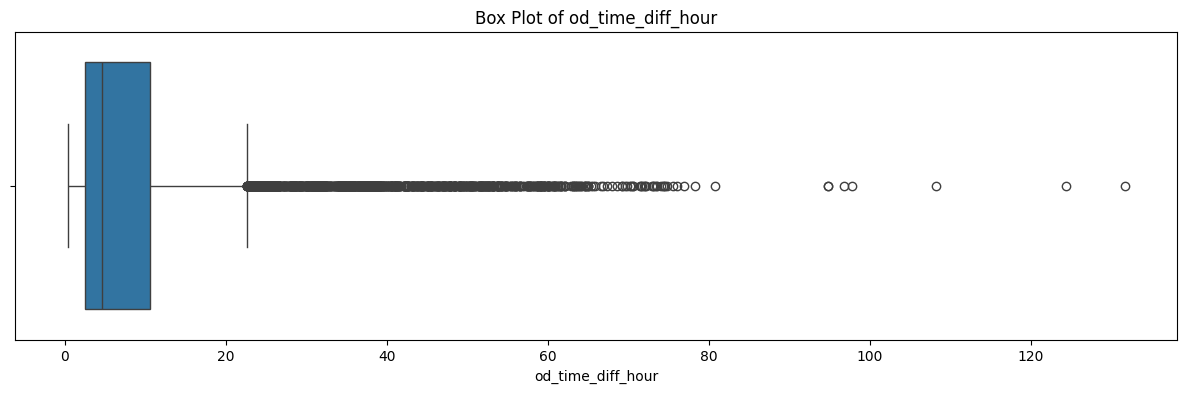

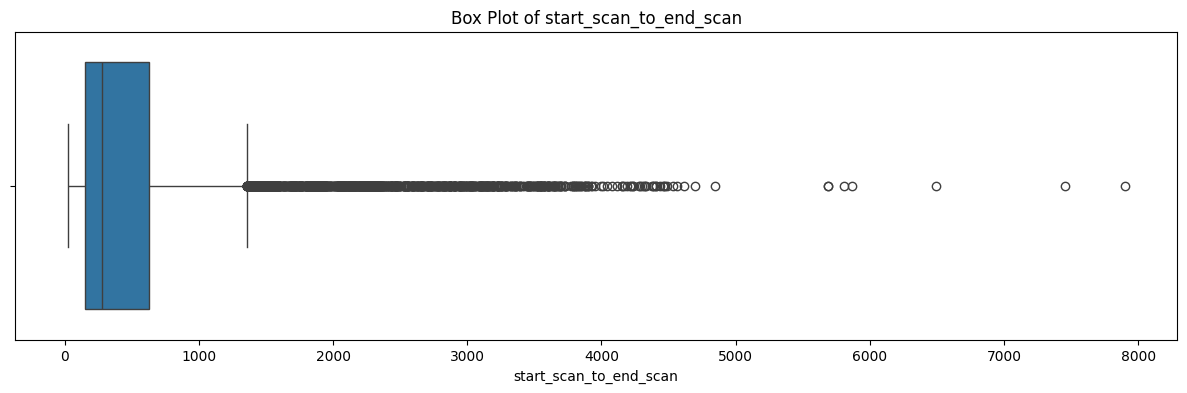

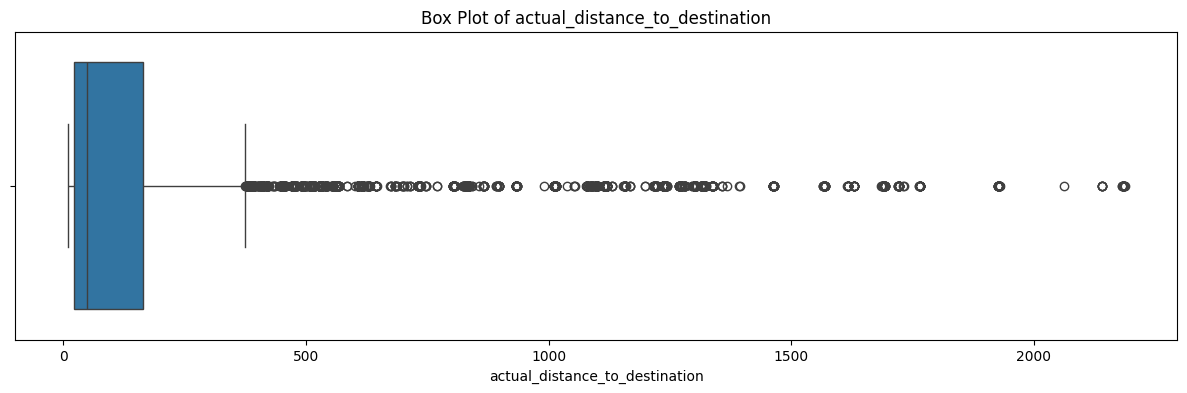

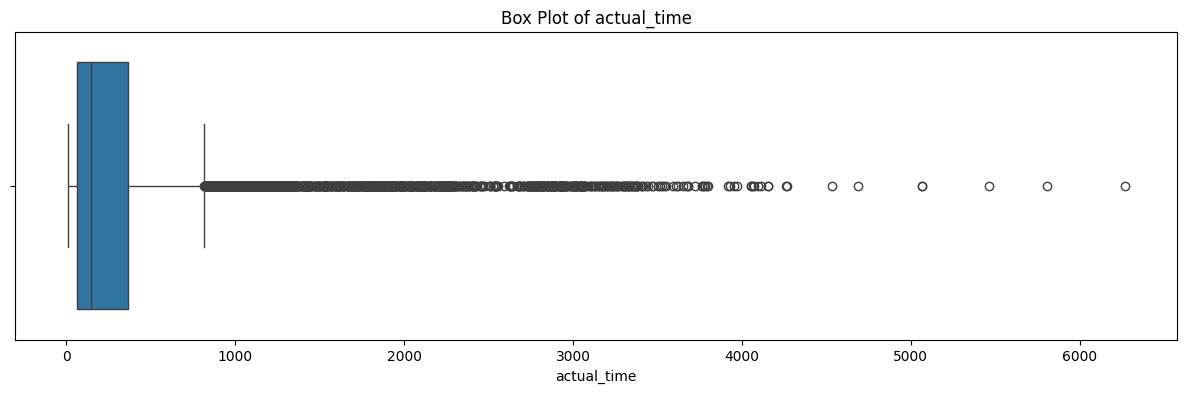

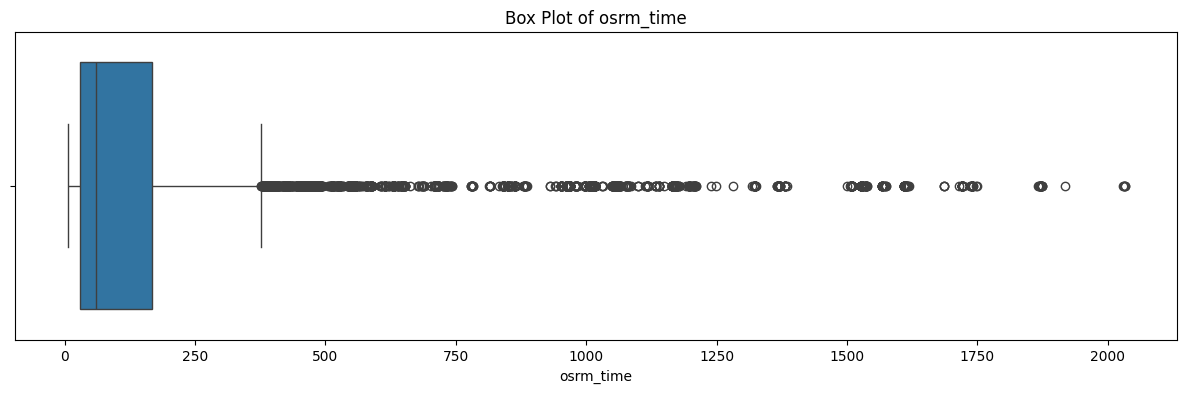

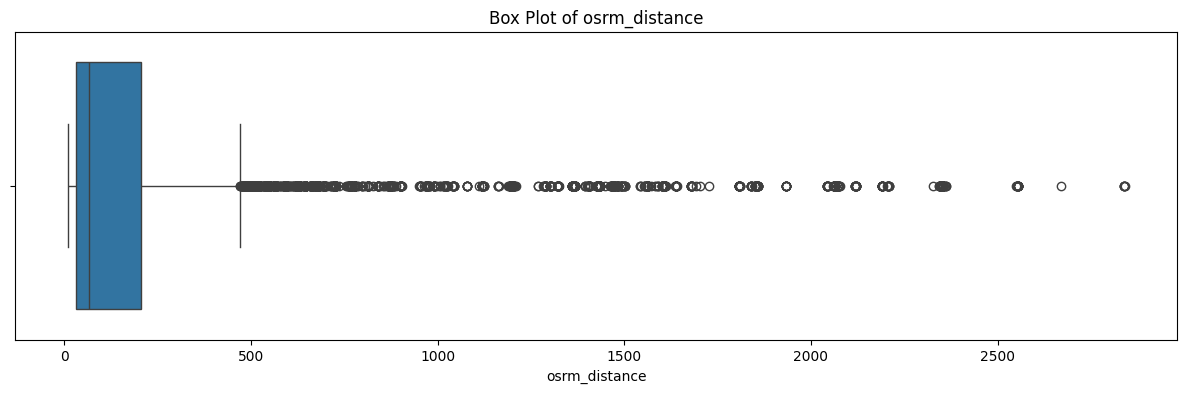

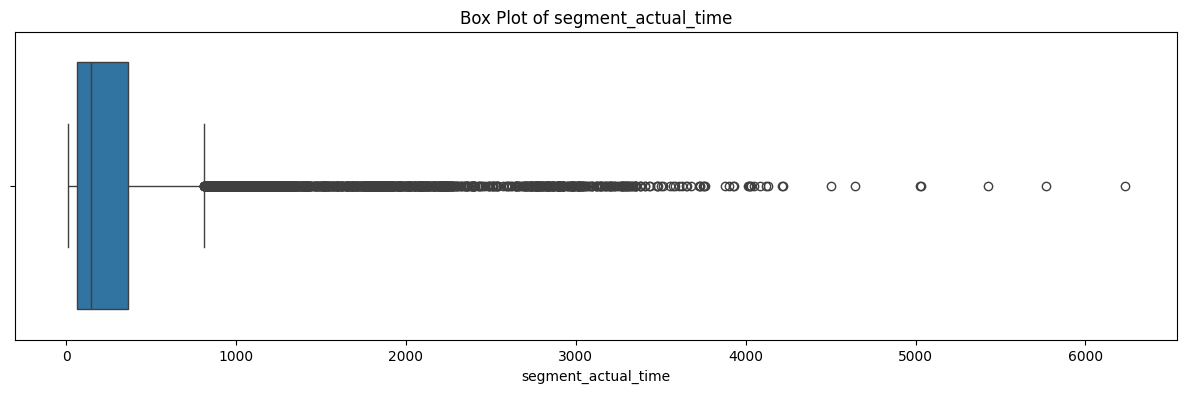

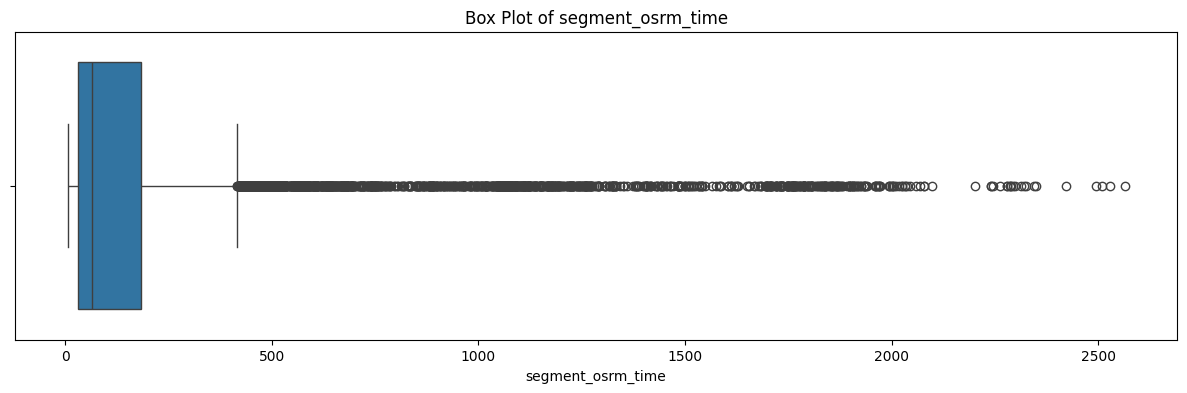

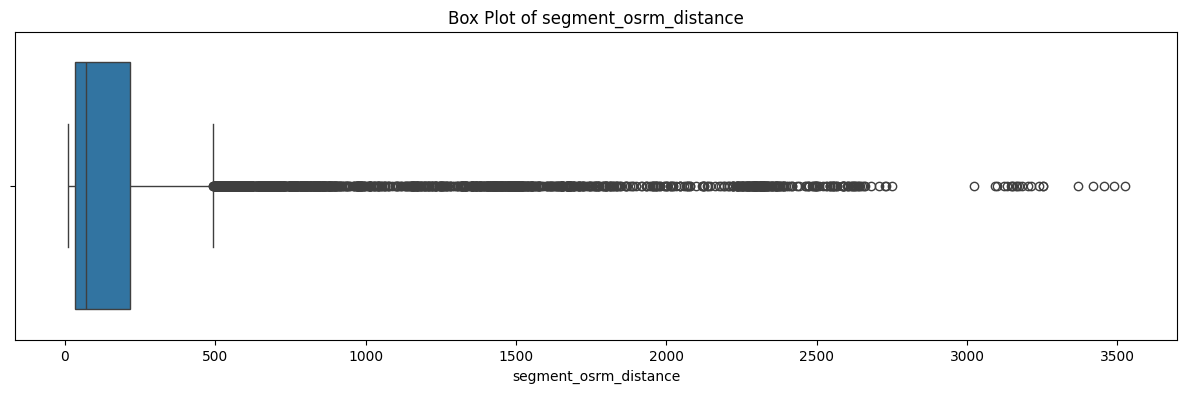

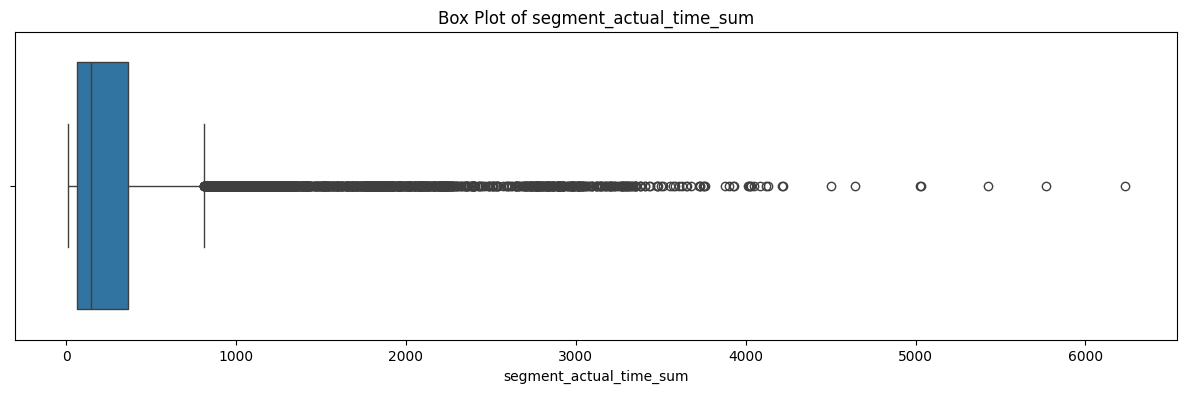

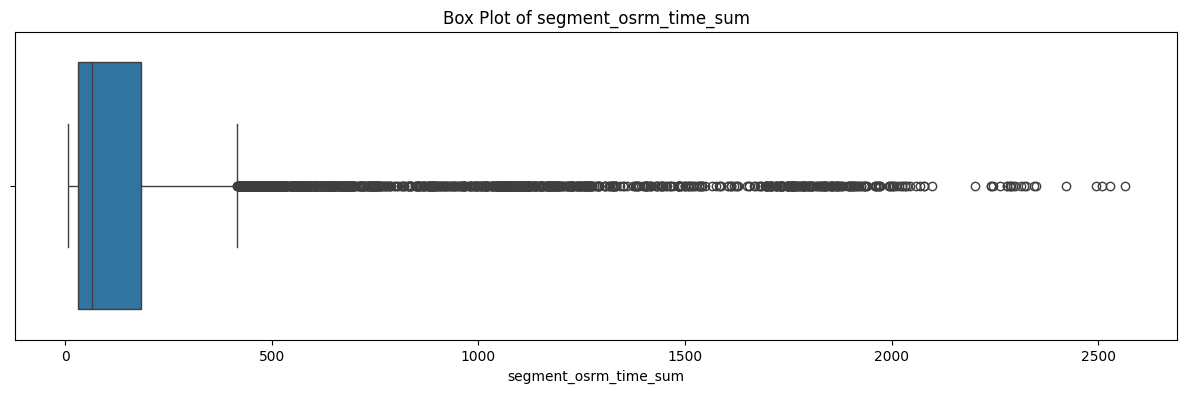

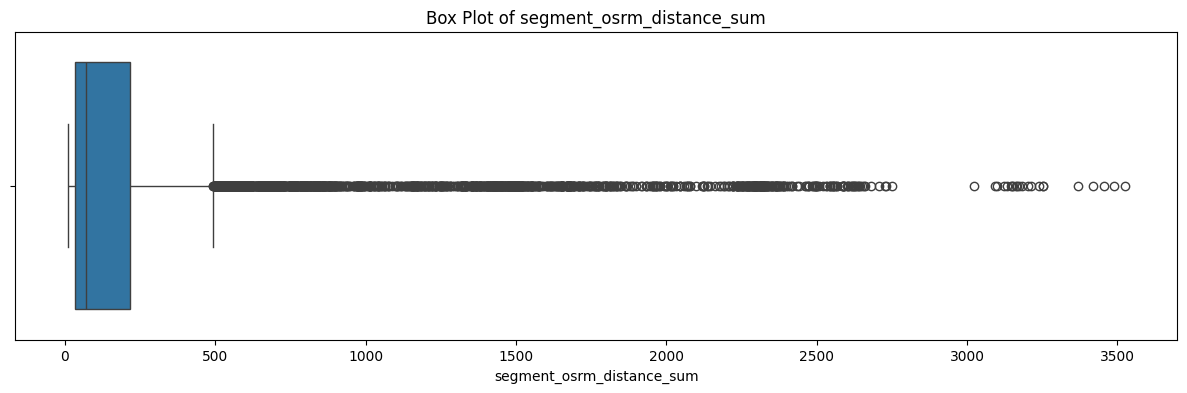

In [ ]:
for feature in numerical_features.columns:
  plt.figure(figsize=(15, 4))
  sns.boxplot(x=df_trip[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

In [ ]:
# obtain the first quartile
Q1 = numerical_features.quantile(0.25)

# obtain the third quartile
Q3 = numerical_features.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814157
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887303
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981758
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981758
dtype: float64


,od_time_diff_hour
0,37.668497
1,3.026865
2,65.572709
3,1.674916
4,11.972484
...,...
14782,4.300482
14783,1.009842
14784,7.035331
14785,5.808548


Clipped data of od_time_diff_hour


,od_time_diff_hour
0,22.654942
1,3.026865
2,22.654942
3,1.674916
4,11.972484
...,...
14782,4.300482
14783,1.009842
14784,7.035331
14785,5.808548



Filtered data of od_time_diff_hour


,od_time_diff_hour
1,3.026865
3,1.674916
4,11.972484
5,3.174797
6,1.633427
...,...
14782,4.300482
14783,1.009842
14784,7.035331
14785,5.808548


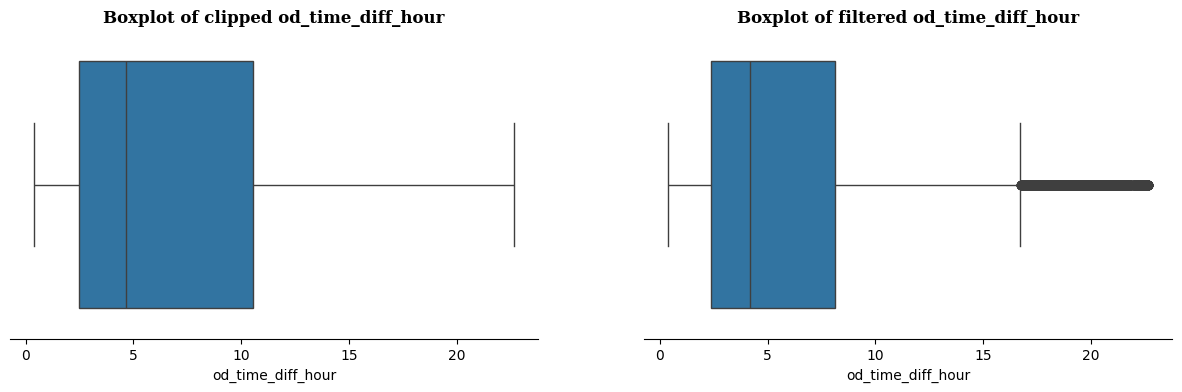

,start_scan_to_end_scan
0,2259.0
1,180.0
2,3933.0
3,100.0
4,717.0
...,...
14782,257.0
14783,60.0
14784,421.0
14785,347.0


Clipped data of start_scan_to_end_scan


,start_scan_to_end_scan
0,1356.5
1,180.0
2,1356.5
3,100.0
4,717.0
...,...
14782,257.0
14783,60.0
14784,421.0
14785,347.0



Filtered data of start_scan_to_end_scan


,start_scan_to_end_scan
1,180.0
3,100.0
4,717.0
5,189.0
6,98.0
...,...
14782,257.0
14783,60.0
14784,421.0
14785,347.0


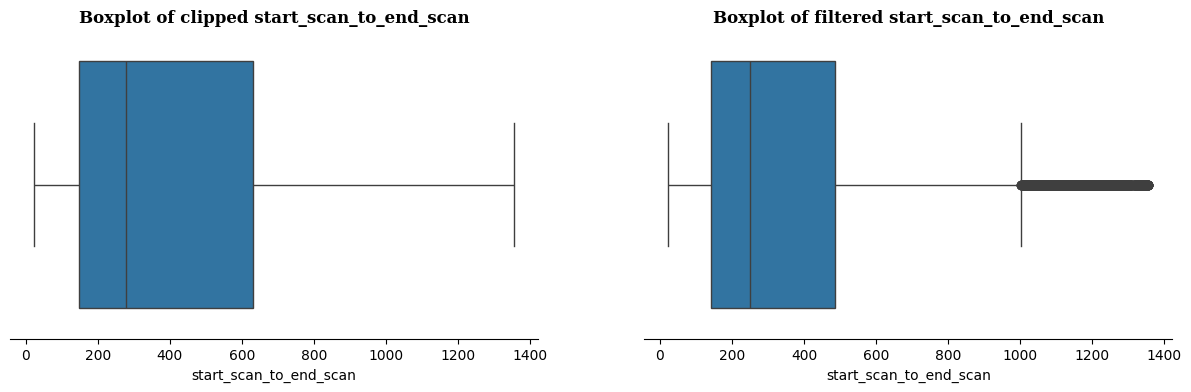

,actual_distance_to_destination
0,824.732849
1,73.186905
2,1927.404297
3,17.175274
4,127.448502
...,...
14782,57.762333
14783,15.513784
14784,38.684837
14785,134.723831


Clipped data of actual_distance_to_destination


,actual_distance_to_destination
0,374.812490
1,73.186905
2,374.812490
3,17.175274
4,127.448502
...,...
14782,57.762333
14783,15.513784
14784,38.684837
14785,134.723831



Filtered data of actual_distance_to_destination


,actual_distance_to_destination
1,73.186905
3,17.175274
4,127.448502
5,24.597050
6,9.100510
...,...
14782,57.762333
14783,15.513784
14784,38.684837
14785,134.723831


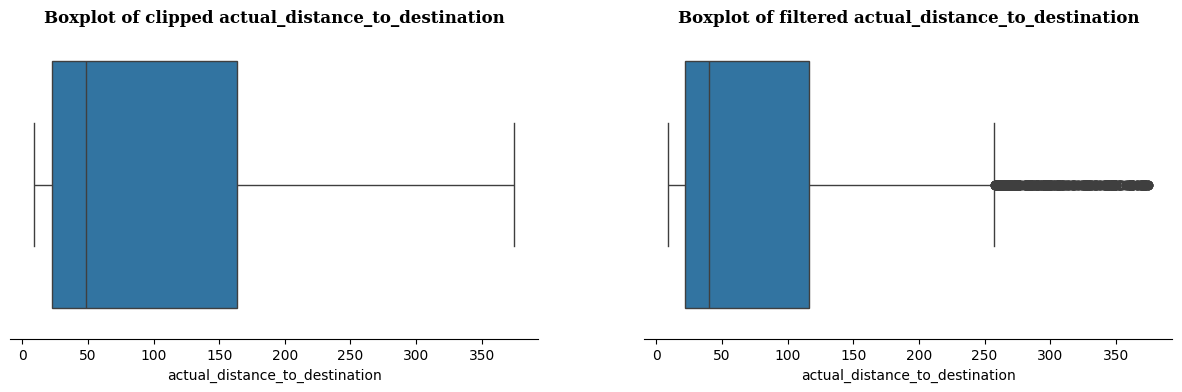

,actual_time
0,1562.0
1,143.0
2,3347.0
3,59.0
4,341.0
...,...
14782,83.0
14783,21.0
14784,282.0
14785,264.0


Clipped data of actual_time


,actual_time
0,817.0
1,143.0
2,817.0
3,59.0
4,341.0
...,...
14782,83.0
14783,21.0
14784,282.0
14785,264.0



Filtered data of actual_time


,actual_time
1,143.0
3,59.0
4,341.0
5,61.0
6,24.0
...,...
14782,83.0
14783,21.0
14784,282.0
14785,264.0


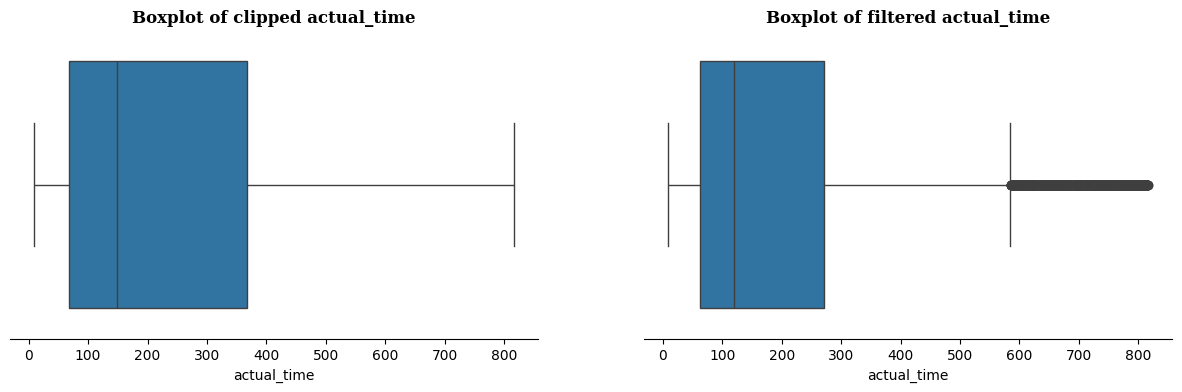

,osrm_time
0,717.0
1,68.0
2,1740.0
3,15.0
4,117.0
...,...
14782,62.0
14783,12.0
14784,48.0
14785,179.0


Clipped data of osrm_time


,osrm_time
0,376.5
1,68.0
2,376.5
3,15.0
4,117.0
...,...
14782,62.0
14783,12.0
14784,48.0
14785,179.0



Filtered data of osrm_time


,osrm_time
1,68.0
3,15.0
4,117.0
5,23.0
6,13.0
...,...
14782,62.0
14783,12.0
14784,48.0
14785,179.0


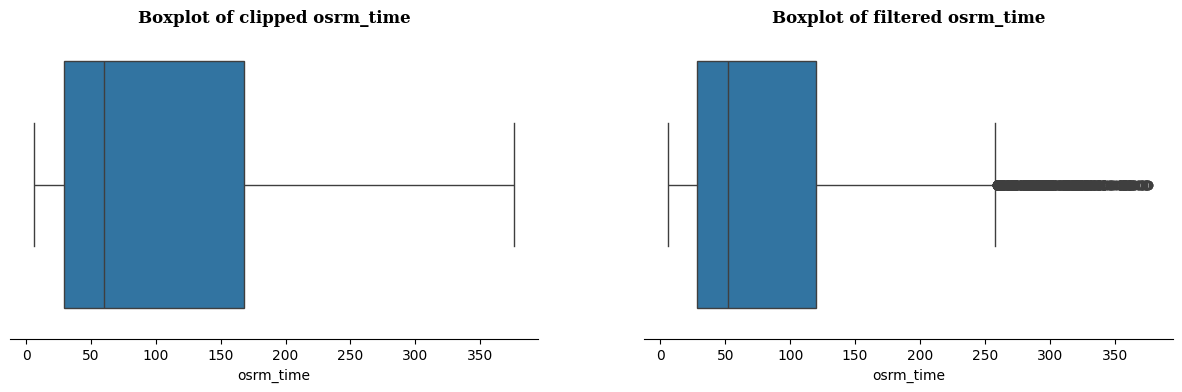

,osrm_distance
0,991.352295
1,85.111000
2,2354.066650
3,19.680000
4,146.791794
...,...
14782,73.462997
14783,16.088200
14784,58.903702
14785,171.110306


Clipped data of osrm_distance


,osrm_distance
0,470.475158
1,85.111000
2,470.475158
3,19.680000
4,146.791794
...,...
14782,73.462997
14783,16.088200
14784,58.903702
14785,171.110306



Filtered data of osrm_distance


,osrm_distance
1,85.111000
3,19.680000
4,146.791794
5,28.064701
6,12.018400
...,...
14782,73.462997
14783,16.088200
14784,58.903702
14785,171.110306


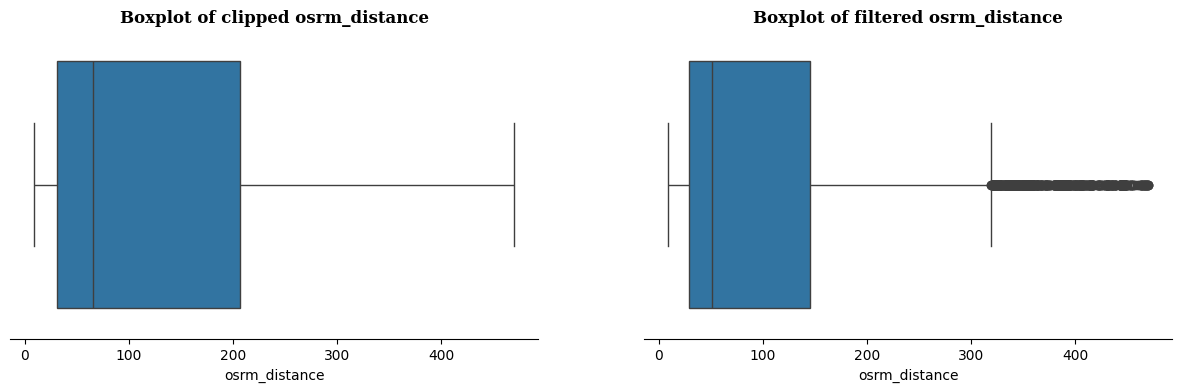

,segment_actual_time
0,1548.0
1,141.0
2,3308.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0


Clipped data of segment_actual_time


,segment_actual_time
0,811.0
1,141.0
2,811.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0



Filtered data of segment_actual_time


,segment_actual_time
1,141.0
3,59.0
4,340.0
5,60.0
6,24.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0


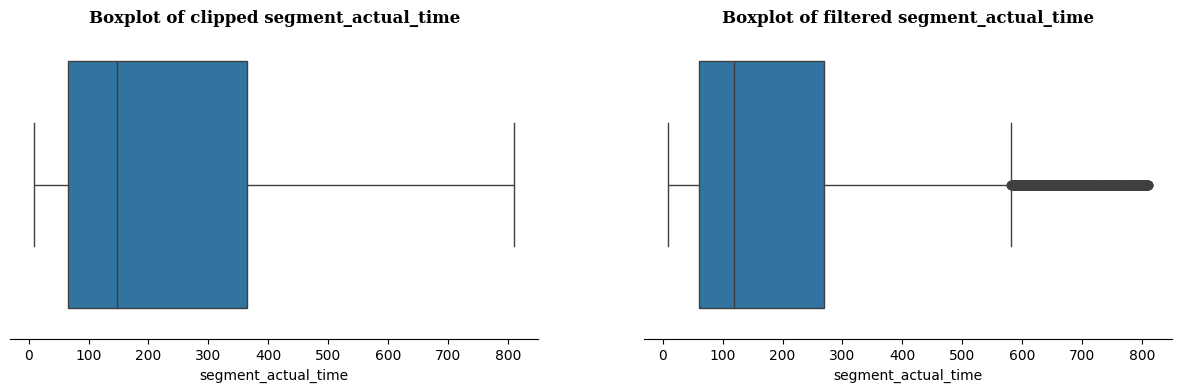

,segment_osrm_time
0,1008.0
1,65.0
2,1941.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0


Clipped data of segment_osrm_time


,segment_osrm_time
0,415.0
1,65.0
2,415.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0



Filtered data of segment_osrm_time


,segment_osrm_time
1,65.0
3,16.0
4,115.0
5,23.0
6,13.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0


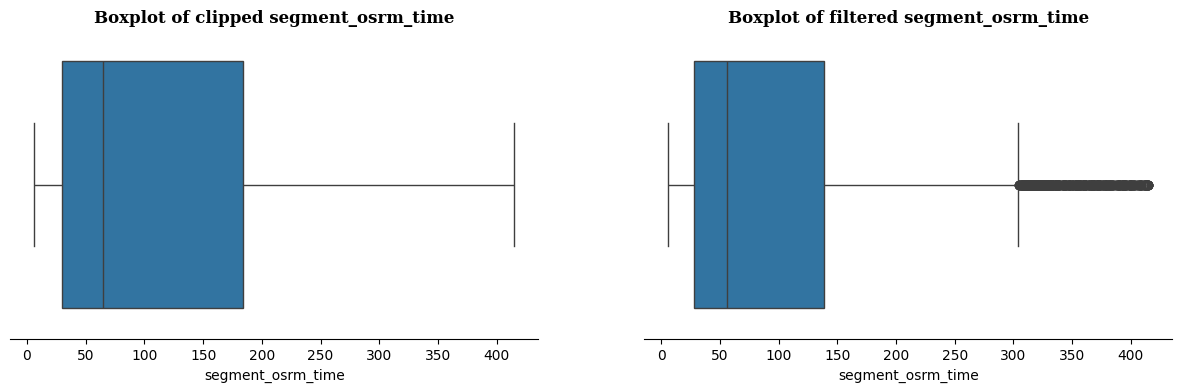

,segment_osrm_distance
0,1320.473267
1,84.189400
2,2545.267822
3,19.876600
4,146.791901
...,...
14782,64.855103
14783,16.088299
14784,104.886597
14785,223.532394


Clipped data of segment_osrm_distance


,segment_osrm_distance
0,492.533245
1,84.189400
2,492.533245
3,19.876600
4,146.791901
...,...
14782,64.855103
14783,16.088299
14784,104.886597
14785,223.532394



Filtered data of segment_osrm_distance


,segment_osrm_distance
1,84.189400
3,19.876600
4,146.791901
5,28.064701
6,12.018400
...,...
14782,64.855103
14783,16.088299
14784,104.886597
14785,223.532394


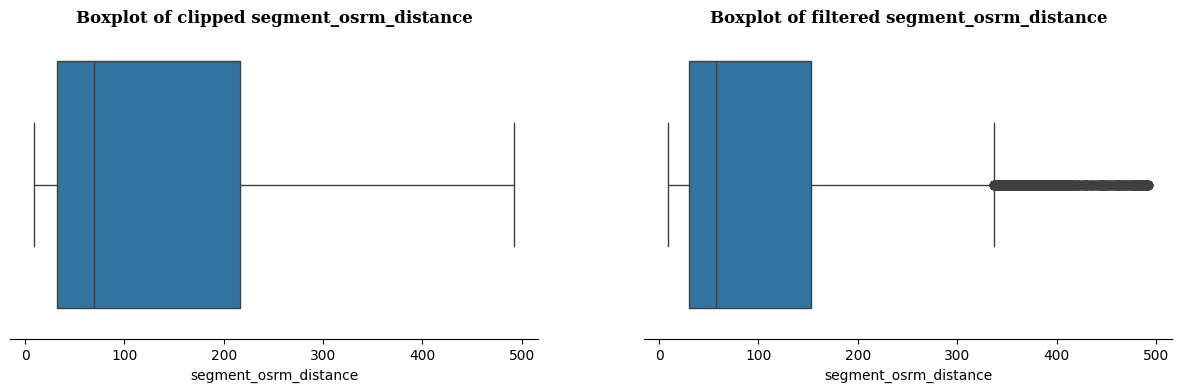

,segment_actual_time_sum
0,1548.0
1,141.0
2,3308.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0


Clipped data of segment_actual_time_sum


,segment_actual_time_sum
0,811.0
1,141.0
2,811.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0



Filtered data of segment_actual_time_sum


,segment_actual_time_sum
1,141.0
3,59.0
4,340.0
5,60.0
6,24.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0


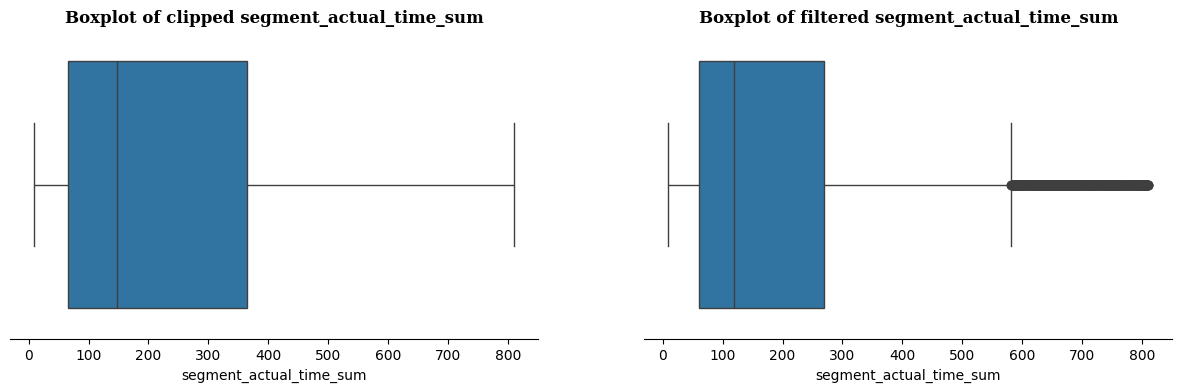

,segment_osrm_time_sum
0,1008.0
1,65.0
2,1941.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0


Clipped data of segment_osrm_time_sum


,segment_osrm_time_sum
0,415.0
1,65.0
2,415.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0



Filtered data of segment_osrm_time_sum


,segment_osrm_time_sum
1,65.0
3,16.0
4,115.0
5,23.0
6,13.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0


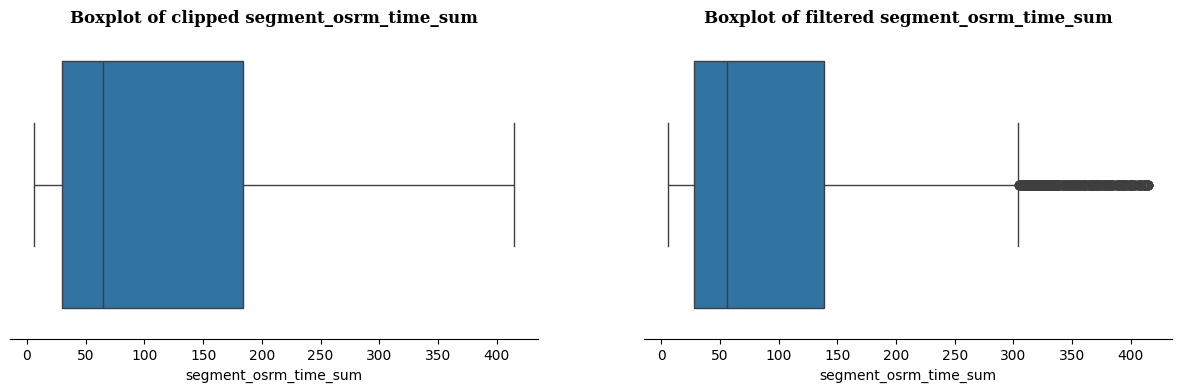

,segment_osrm_distance_sum
0,1320.473267
1,84.189400
2,2545.267822
3,19.876600
4,146.791901
...,...
14782,64.855103
14783,16.088299
14784,104.886597
14785,223.532394


Clipped data of segment_osrm_distance_sum


,segment_osrm_distance_sum
0,492.533245
1,84.189400
2,492.533245
3,19.876600
4,146.791901
...,...
14782,64.855103
14783,16.088299
14784,104.886597
14785,223.532394



Filtered data of segment_osrm_distance_sum


,segment_osrm_distance_sum
1,84.189400
3,19.876600
4,146.791901
5,28.064701
6,12.018400
...,...
14782,64.855103
14783,16.088299
14784,104.886597
14785,223.532394


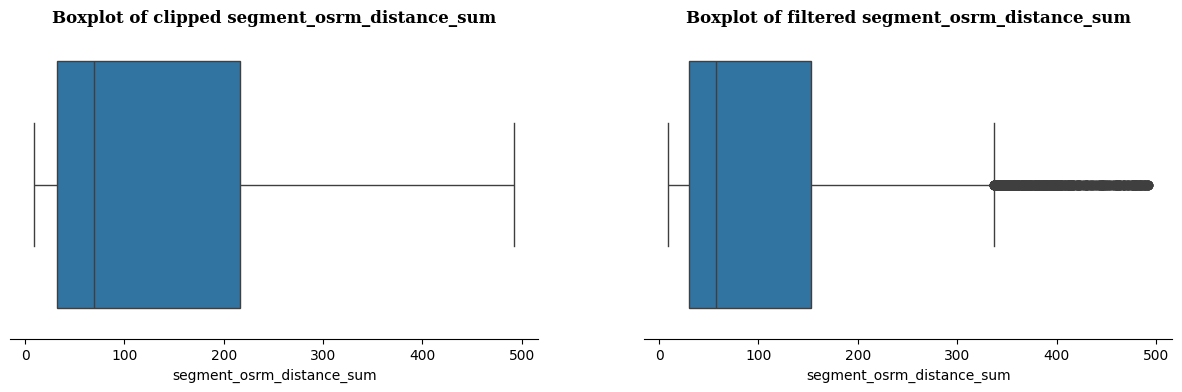

In [ ]:
for i, col in enumerate(numerical_features):
    data = df_trip[col]
    display(data.to_frame())

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    clipped_data = np.clip(data, lower_bound, upper_bound)
    print(f'Clipped data of {col}')
    display(clipped_data.to_frame())
    print()

    # Plot boxplot of the clipped data
    plt.figure(figsize=(15, 4))

    plt.subplot(121)
    sns.boxplot(x=clipped_data)
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12)

    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    print(f'Filtered data of {col}')
    display(filtered_data.to_frame())
    print()

    plt.subplot(122)
    sns.boxplot(x=filtered_data)
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12)

    plt.show()

**Insight:**

1. Upon examining the data after outlier removal, it is evident that outliers still persist. This highlights the importance of recognizing that the first (Q1) and third (Q3) quartiles do not always have to be the 25th and 75th percentiles, respectively. By adjusting Q1 and Q3 to the 10th and 90th percentiles, we can observe the impact on the data distribution through plotting.

2. Clipped data, which replaces outlier values with specified boundary values, and filtered data, which reduces the number of outliers, were both utilized for further analysis. This dual approach provides a comprehensive understanding of the data's behavior and ensures robust analysis.

In [ ]:
num_df = numerical_features.copy()
num_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267,1548.0,1008.0,1320.473267
1,3.026865,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400,141.0,65.0,84.189400
2,65.572709,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822,3308.0,1941.0,2545.267822
3,1.674916,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600,59.0,16.0,19.876600
4,11.972484,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103,82.0,62.0,64.855103
14783,1.009842,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299,21.0,11.0,16.088299
14784,7.035331,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597,281.0,88.0,104.886597
14785,5.808548,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394,258.0,221.0,223.532394


In [ ]:
Q1 = np.percentile(num_df[numerical_columns], 25)
Q3 = np.percentile(num_df[numerical_columns], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clipped_num_df = np.clip(num_df[numerical_columns], lower_bound, upper_bound)
display(clipped_num_df)

filtered_num_df = num_df[numerical_columns][(num_df[numerical_columns] >= lower_bound) | (num_df[numerical_columns] <= upper_bound)]
display(filtered_num_df)

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302
1,3.026865,180.000000,73.186905,143.000000,68.000000,85.111000,141.000000,65.000000,84.189400,141.000000,65.000000,84.189400
2,65.572709,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302,543.285302
3,1.674916,100.000000,17.175274,59.000000,15.000000,19.680000,59.000000,16.000000,19.876600,59.000000,16.000000,19.876600
4,11.972484,543.285302,127.448502,341.000000,117.000000,146.791794,340.000000,115.000000,146.791901,340.000000,115.000000,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.000000,57.762333,83.000000,62.000000,73.462997,82.000000,62.000000,64.855103,82.000000,62.000000,64.855103
14783,1.009842,60.000000,15.513784,21.000000,12.000000,16.088200,21.000000,11.000000,16.088299,21.000000,11.000000,16.088299
14784,7.035331,421.000000,38.684837,282.000000,48.000000,58.903702,281.000000,88.000000,104.886597,281.000000,88.000000,104.886597
14785,5.808548,347.000000,134.723831,264.000000,179.000000,171.110306,258.000000,221.000000,223.532394,258.000000,221.000000,223.532394


,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267,1548.0,1008.0,1320.473267
1,3.026865,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400,141.0,65.0,84.189400
2,65.572709,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822,3308.0,1941.0,2545.267822
3,1.674916,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600,59.0,16.0,19.876600
4,11.972484,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103,82.0,62.0,64.855103
14783,1.009842,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299,21.0,11.0,16.088299
14784,7.035331,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597,281.0,88.0,104.886597
14785,5.808548,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394,258.0,221.0,223.532394


**4.3 Perform one-hot encoding on categorical features.**



In [ ]:
categorical_cols = ['data', 'route_type']

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
encoded_cat_cols = ohe.fit_transform(df_trip[categorical_cols])

# Create a DataFrame with the encoded columns
categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))

# Display the encoded DataFrame
display(categorical_encoded_df)

,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14782,1.0,0.0,1.0,0.0
14783,1.0,0.0,1.0,0.0
14784,1.0,0.0,1.0,0.0
14785,1.0,0.0,1.0,0.0


In [ ]:
# Concatenate the original DataFrame with the encoded DataFrame
encoded_df = pd.concat([df_trip, categorical_encoded_df], axis=1)
display(encoded_df)

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,source_state,source_place,destination_name,destination_city,destination_state,destination_place,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Uttar Pradesh,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,Karnataka,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Haryana,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Karnataka,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,Punjab,Mehmdpur_H,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC,1.0,0.0,1.0,0.0
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,Haryana,Balabhgarh_DPC,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh_DC,1.0,0.0,1.0,0.0
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,Uttar Pradesh,GovndNgr_DC,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6,1.0,0.0,1.0,0.0
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,Tamil Nadu,VdkkuSrt_I,Eral_Busstand_D (Tamil Nadu),Eral,Tamil Nadu,Busstand_D,1.0,0.0,1.0,0.0


**4.4 Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [ ]:
numerical_columns

['od_time_diff_hour',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum']

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Transform the numerical features
scaled_numerical_features = scaler.fit_transform(df_trip[numerical_columns])

# Create a new DataFrame with the scaled features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_columns)
scaled_numerical_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.530301,0.756450,0.721625
3,0.009782,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.008037,0.003909,0.003074
4,0.088239,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.053207,0.042611,0.039185
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,0.029786,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872,0.011734,0.021892,0.015872
14783,0.004715,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996,0.001929,0.001955,0.001996
14784,0.050623,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262,0.043723,0.032056,0.027262
14785,0.041276,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020,0.040026,0.084050,0.061020


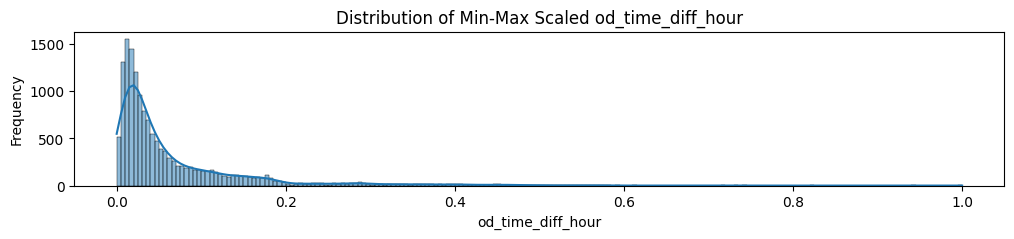

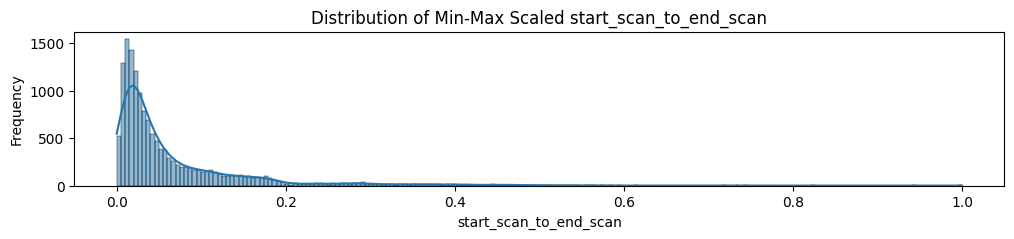

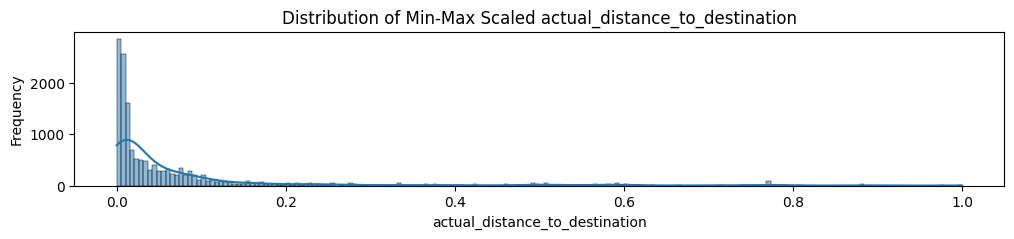

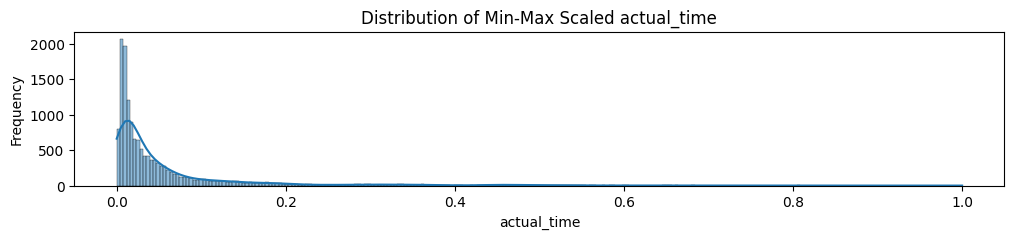

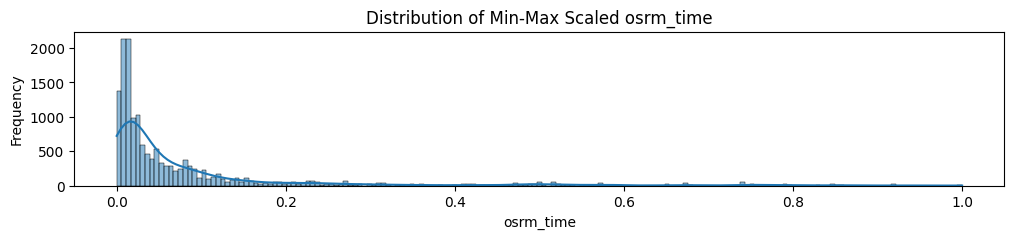

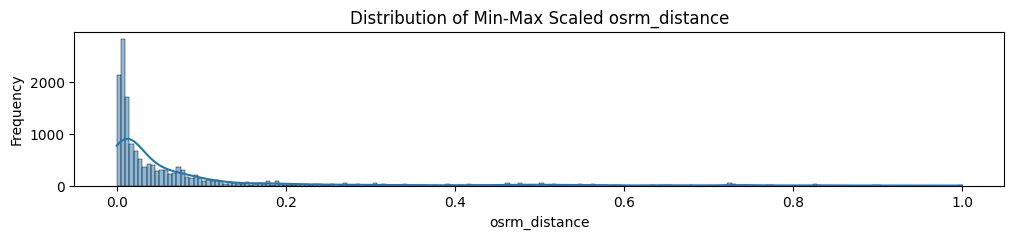

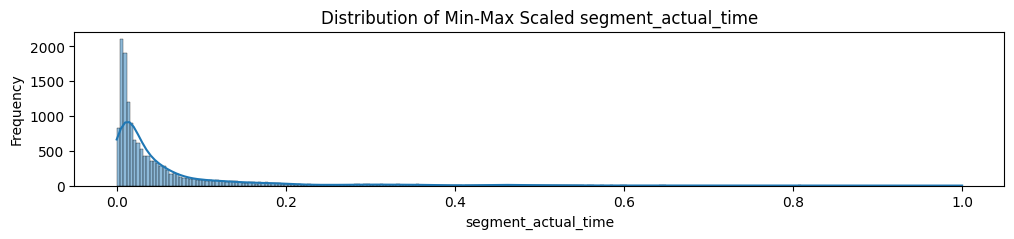

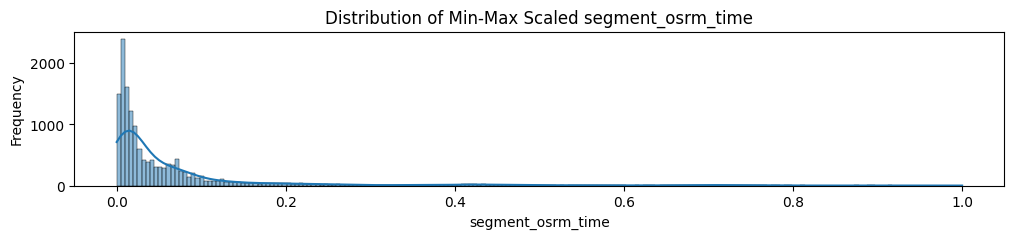

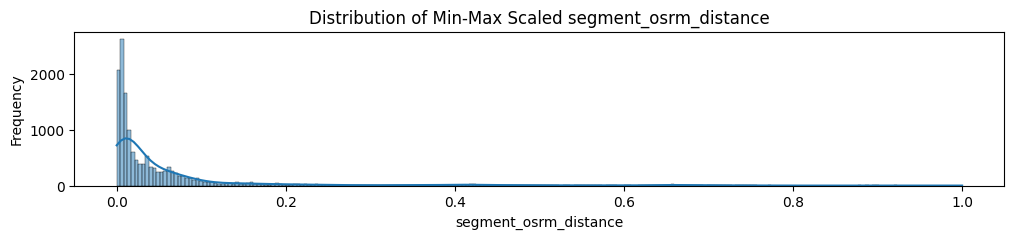

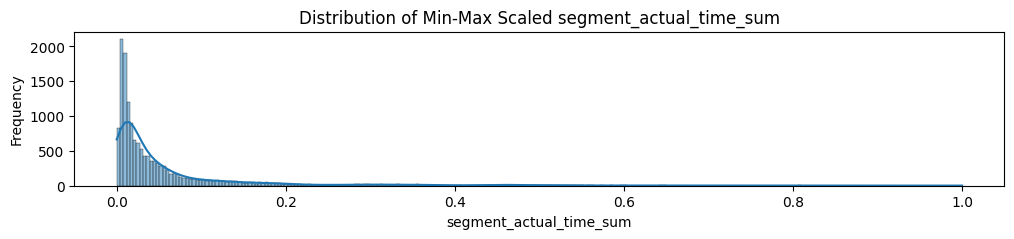

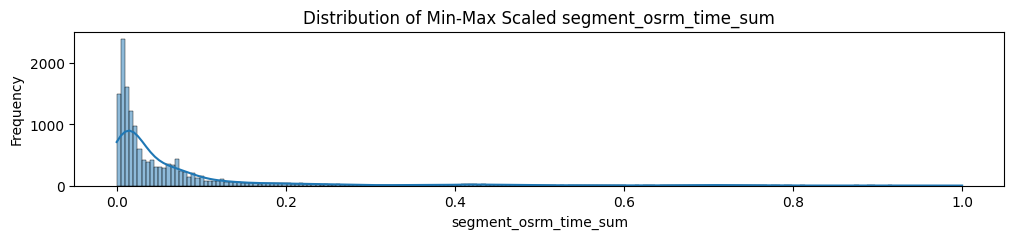

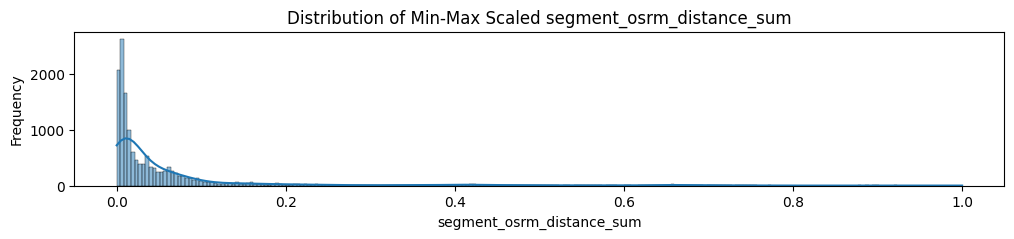

In [ ]:
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(12, 2))
    sns.histplot(scaled_numerical_df[col], kde=True)
    plt.title(f"Distribution of Min-Max Scaled {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Insight on Standardization and Data Distribution**


Standardization is a powerful technique for scaling data, but it’s important to note that it works best when the data follows a normal (Gaussian) distribution. If the data is not Gaussian, standardization might not be the most effective approach. Instead, other scaling methods, such as min-max scaling or robust scaling, could be more appropriate for non-Gaussian data distributions. Understanding the underlying distribution of your data is crucial for selecting the right preprocessing technique and ensuring accurate and meaningful analysis.

In [ ]:
# Standardizing the numerical features using StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df_trip[numerical_columns])
# Converting the scaled features back to a dataframe
standard_scaled_df = pd.DataFrame(standard_scaled, columns=numerical_columns)
standard_scaled_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,2.625886,2.627598,2.162548,2.147277,2.048290,2.125107,2.147833,2.629714,2.633597,2.147833,2.629714,2.633597
1,-0.529518,-0.530859,-0.297563,-0.379887,-0.342571,-0.320538,-0.381163,-0.367090,-0.332307,-0.381163,-0.367090,-0.332307
2,5.167598,5.170772,5.772034,5.326268,5.816936,5.802622,5.311326,5.594737,5.571936,5.311326,5.594737,5.571936
3,-0.652664,-0.652397,-0.480911,-0.529486,-0.537818,-0.497115,-0.528553,-0.522809,-0.486596,-0.528553,-0.522809,-0.486596
4,0.285312,0.284962,-0.119943,-0.027259,-0.162059,-0.154082,-0.023473,-0.208192,-0.182120,-0.023473,-0.208192,-0.182120
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,-0.413508,-0.413880,-0.348054,-0.486744,-0.364674,-0.351972,-0.487212,-0.376623,-0.378690,-0.487212,-0.376623,-0.378690
14783,-0.713243,-0.713166,-0.486350,-0.597162,-0.548870,-0.506808,-0.596856,-0.538699,-0.495684,-0.596856,-0.538699,-0.495684
14784,-0.164399,-0.164728,-0.410502,-0.132335,-0.416249,-0.391263,-0.129522,-0.293997,-0.282653,-0.129522,-0.293997,-0.282653
14785,-0.276143,-0.277150,-0.096128,-0.164392,0.066344,-0.088455,-0.170863,0.128670,0.001984,-0.170863,0.128670,0.001984


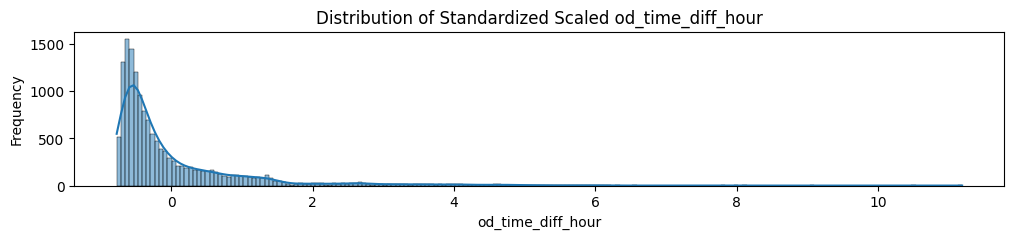

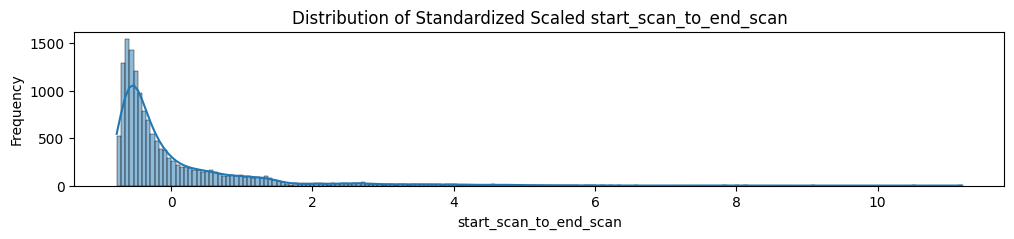

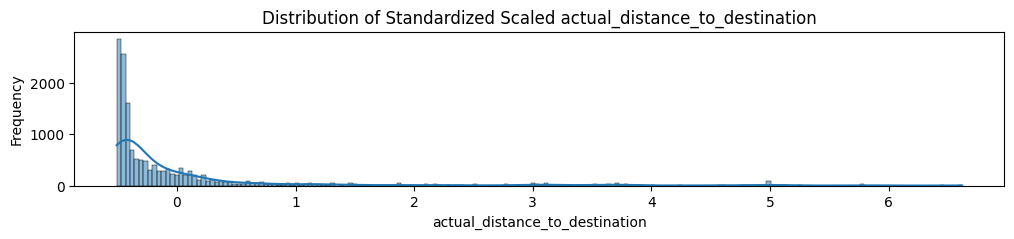

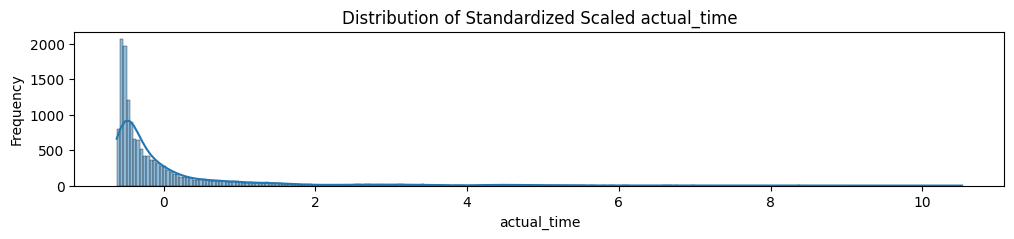

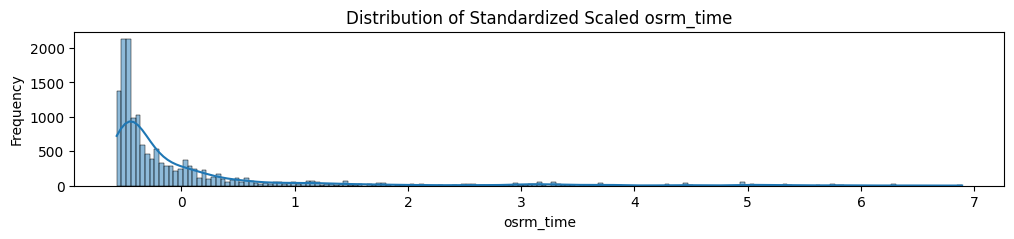

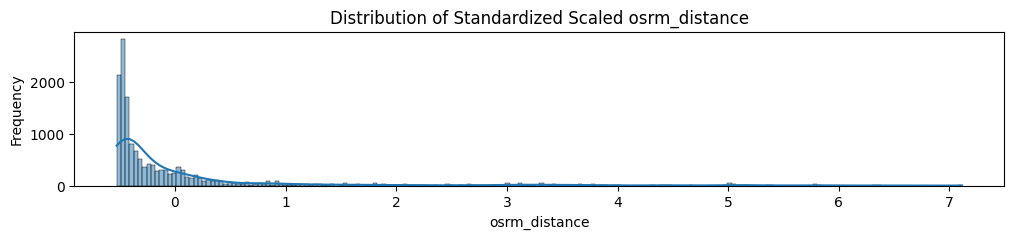

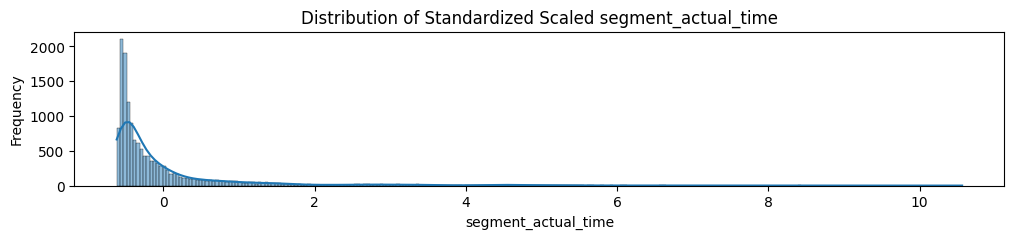

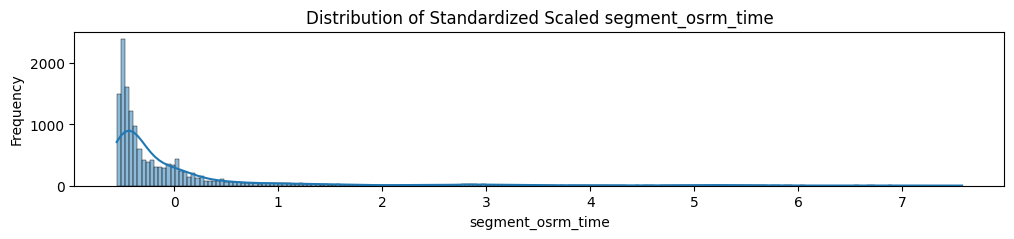

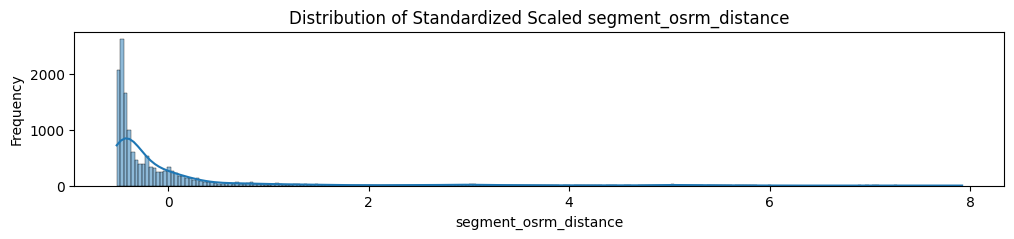

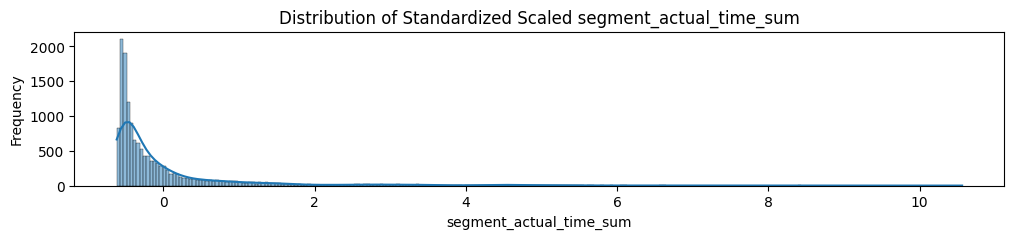

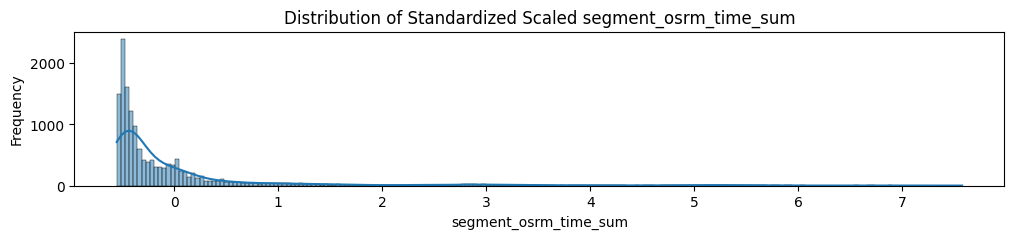

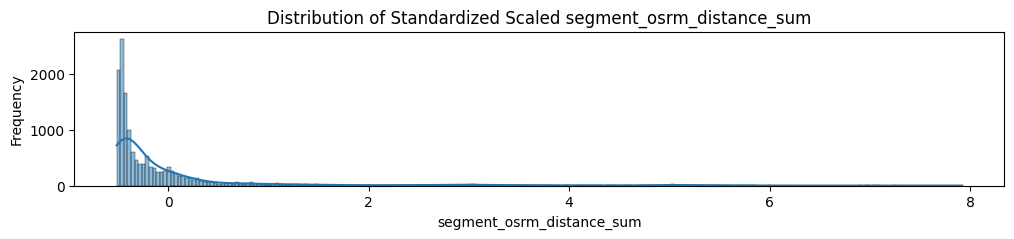

In [ ]:
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(12, 2))
    sns.histplot(standard_scaled_df[col], kde=True)
    plt.title(f"Distribution of Standardized Scaled {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**🔍 Insight:**

1. **Trip-Level Aggregation:** Aggregating data at the trip level provides insights into the overall delivery performance for each trip. For example, we can identify the total duration of a trip, the total distance covered, or the number of segments in a trip.
2. **Outlier Detection and Treatment:** The identification of outliers in numerical features can indicate exceptional cases or potential data errors. Applying appropriate treatment techniques such as clipping or filtering can ensure the robustness of subsequent analyses.
3. **Categorical Feature Encoding:** Applying one-hot encoding to categorical features like 'route_type' and 'data' allows for more effective utilization of this data during modeling, particularly in machine learning algorithms.
4. **Data Scaling and Standardization:** Normalizing or standardizing numerical features can improve the performance of machine learning models, particularly those that are sensitive to the scale of features. In our case, scaling features like 'od_time_diff_hour' and 'actual_time' helps improve model training and prediction accuracy.

These insights provide a deeper understanding of the dataset and guide us in preparing it for modeling and analysis, optimizing the accuracy and reliability of our results.


# **🧪 5. Hypothesis Testing**

## **5.1 🧠 Perform Hypothesis Testing**


Perform hypothesis testing / visual analysis between:

> 📌 **actual_time** aggregated value and **OSRM time** aggregated value.

> 📌 **actual_time** aggregated value and **segment actual time** aggregated value.

> 📌 **OSRM distance** aggregated value and **segment OSRM distance** aggregated value.

> 📌 **OSRM time** aggregated value and **segment OSRM time** aggregated value.



### 🔻 **STEP 1**: Set up Null Hypothesis  

> **Null Hypothesis (Ho)** - There is no significant difference in the mean values between `column1` and `column2`.

- $H_{o}$: $μ_{col1}$ = $μ_{col2}$

> **Alternate Hypothesis (Ha)** - There is a significant difference in the mean values between `column1` and `column2`.

- $H_{a}$: $μ_{col1}$ ≠ $μ_{col2}$



### 🔻 **STEP 2**: Check Basic Assumptions for the Hypothesis

- **Normality Checks** :

  > Use **QQ Plot** & **Prob Plot** to visually check distribution.

  - Confirm with **Shapiro-Wilks Test** .
  - Confirm with **Anderson-Darling Test** .
  
- **Homogeneity of Variances**:

  > Use **Levene's Test** to check if variances are equal between the two groups.


### 🔻 **STEP 3**: Define Test Statistics; Distribution of T Under Ho

- We know that the test statistic for a **T-Test** follows a **T-distribution**.

> For **independent variables**:
  
  - If data follows normal distribution  use **ttest_ind**.
  - If not normal use **Mann-Whitney U Test** (Non-Parametric).

> For **dependent variables** (paired T-test):
  
  - If data follows normal distribution use **ttest_rel**.
  - If not normal use **Wilcoxon Signed Rank Test** (Non-Parametric).

### 🔻 **STEP 4**: Decide the Kind of Test

- We will be performing a **Two-Tailed T-Test** ⚖️.


###🔻 **STEP 5**: Compute the p-value and Fix Alpha

- Compute the **t-stat** value using the **ttest** function from `scipy.stats` .
- Set **alpha = 0.05** (i.e. confidence level = 95%).


### 🔻 **STEP 6**: Compare p-value and Alpha

- Based on the **p-value**, we will either **accept** or **reject Ho**:

  > **p-val < alpha** 🔴: Reject Ho (Significant Difference).
  
  > **p-val > alpha** 🟢: Accept Ho (No Significant Difference).


In [ ]:
class NormalityCheck:
    def __init__(self, name, col):
        self.name = name
        self.col = col

    def shapiro_and_anderson(self):
        print(f"Performing SHAPIRO & ANDERSON-DARLING TEST for '{self.name}' column\n")

        # Shapiro-Wilk Test
        shapiro_stat, p_val = shapiro(self.col)
        print(f'Shapiro-Wilk Test\n{self.name} - Data is {"not Gaussian" if p_val < 0.05 else "Gaussian"} (p-value: {p_val})\n')

        # Anderson-Darling Test
        result = anderson(self.col)
        print(f"Anderson-Darling Test\n{self.name} - Data {'does not follow' if result.statistic > result.critical_values[2] else 'follows'} a normal distribution (statistic: {result.statistic})\n")
        print('-'*50)

    def boxcox_transformation(self):
        print(f'Performing BOXCOX transformation on {self.name} column')
        transformed_data, best_lambda = boxcox(self.col)
        self.col = transformed_data  # Update column data with transformed data
        print(f'Best Lambda for {self.name}: {best_lambda}\n')
        self.shapiro_and_anderson()  # Calling shapiro_and_anderson method after transformation

In [ ]:
def levene_test(name1, name2, col1, col2):
    levene_stat, p_value = levene(col1, col2)

    print(f'Performing Levene Test for {name1} & {name2}\n')

    print(f'{"Does not have Homogeneous (different) Variance" if p_value < 0.05 else "Have Homogeneous (similar) Variance"} (p-value: {p_value})\n')
    print('-'*50)

In [ ]:
def mannwhitneyu_test(name1, name2, col1, col2):
    print(f'Performing Non-parametric Test - Mann-Whitney U for {name1} & {name2}')

    test_stat, p_value = mannwhitneyu(col1, col2)

    result = (
        f"Reject Null Hypothesis\nThere is a significant difference in the Mean values of {name1} and {name2}"
        if p_value < 0.05
        else f"Failed to Reject Null Hypothesis - Accept Ho\nThere is NO significant difference in the Mean values of {name1} and {name2}"
    )

    print(result)
    print('-' * 50)

    return ""

In [ ]:
def normality_plots(name1, name2, name3, name4, col1, col2, col3, col4):
    plt.figure(figsize=(20, 10))
    plt.suptitle("Normality Check - Histplot & QQ Plot", fontsize=16, fontweight="bold", backgroundcolor='black', color='white')

    colors = ['royalblue', 'tomato', 'gold', 'forestgreen']
    cols = [(name1, col1, colors[0]), (name2, col2, colors[1]), (name3, col3, colors[2]), (name4, col4, colors[3])]

    for i, (name, col, color) in enumerate(cols, 1):
        plt.subplot(2, 4, i)
        sns.histplot(col, element='step', color=color, kde=True, label=name)
        plt.title(f'Histplot - {name}', fontsize=10, fontweight="bold", backgroundcolor=color, color='white')
        plt.legend()

        plt.subplot(2, 4, i + 4)
        probplot(col, plot=plt, dist='norm')
        plt.title(f'Probplot - {name}', fontsize=10, fontweight="bold", backgroundcolor=color, color='white')

    sns.despine()
    plt.show()

### **5.1.1 ⏳ Actual Time vs. OSRM Time**
Compare actual time aggregated value with OSRM time aggregated value.

In [ ]:
actual_time = clipped_num_df['actual_time']
osrm_time = clipped_num_df['osrm_time']
fil_actual_time = filtered_num_df['actual_time']
fil_osrm_time = filtered_num_df['osrm_time']

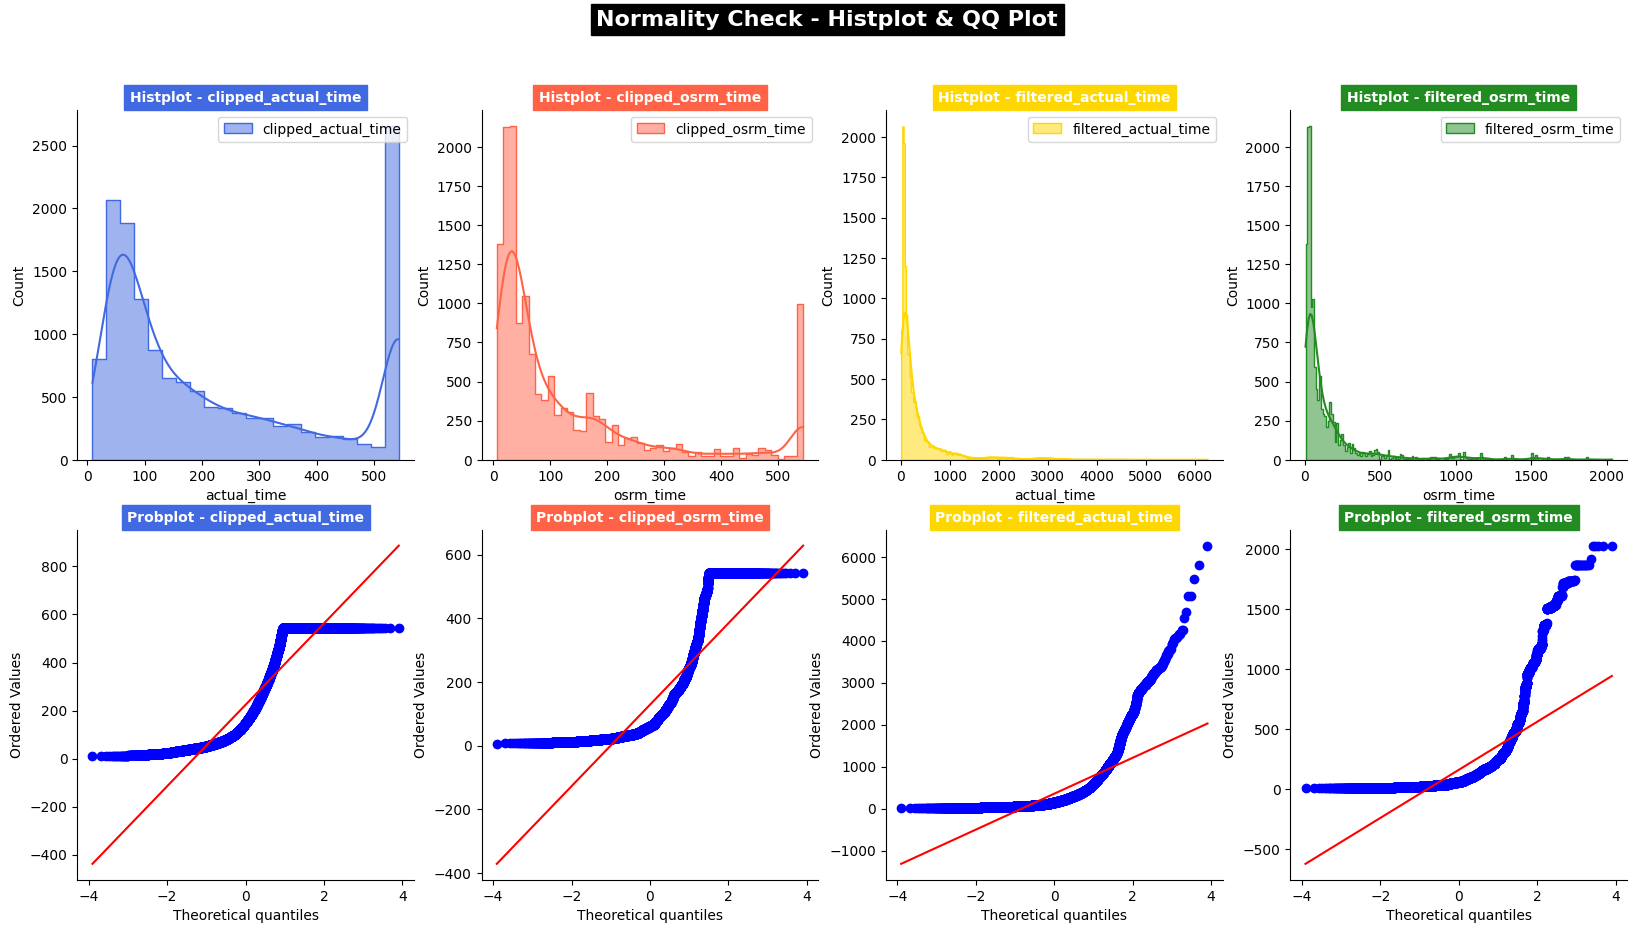

In [ ]:
normality_plots('clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time',actual_time,osrm_time,fil_actual_time,fil_osrm_time)

In [ ]:
col_names= ['clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time']
cols = [actual_time,osrm_time,fil_actual_time,fil_osrm_time]

for _ in zip(col_names,cols):
    normality = NormalityCheck(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_actual_time' column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian (p-value: 1.1637386759978893e-81)

Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution (statistic: 917.4939591086422)

--------------------------------------------------
Performing BOXCOX transformation on clipped_actual_time column
Best Lambda for clipped_actual_time: 0.10105776555401934

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_actual_time' column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian (p-value: 5.726100581440296e-61)

Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution (statistic: 269.7345488086994)

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_osrm_time' column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian (p-value: 3.5736279564800333e-93)

Anderson-Darling Test
cli

In [ ]:
levene_test('clipped_actual_time','clipped_osrm_time',actual_time,osrm_time),
levene_test('filtered_actual_time','filtered_osrm_time',fil_actual_time,fil_osrm_time)

Performing Levene Test for clipped_actual_time & clipped_osrm_time

Does not have Homogeneous (different) Variance (p-value: 4.662057376491051e-269)

--------------------------------------------------
Performing Levene Test for filtered_actual_time & filtered_osrm_time

Does not have Homogeneous (different) Variance (p-value: 8.744454037320379e-219)

--------------------------------------------------


### **Wilcoxon signed rank test:**

**🔻With clipped data**

**H0**: aggregated actual time is same as aggregated osrm time

**Ha**: aggregated actual time is more than the aggregated osrm time

In [ ]:
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(fil_actual_time,fil_osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")


Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


**🔻 With filtered data**

In [ ]:
alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(fil_actual_time,fil_osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")

Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


In [ ]:
### MannWhitney u Rank test

test_cols = [('clipped_actual_time','clipped_osrm_time',actual_time,osrm_time),
       ('filtered_actual_time','filtered_osrm_time',fil_actual_time,fil_osrm_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - Mann-Whitney U for clipped_actual_time & clipped_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_actual_time and clipped_osrm_time
--------------------------------------------------
Performing Non-parametric Test - Mann-Whitney U for filtered_actual_time & filtered_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_actual_time and filtered_osrm_time
--------------------------------------------------


### **🔍 Insights**

- The Mann-Whitney U test shows a significant difference in the mean values of Aggregated actual_time and Aggregated osrm_time.

>* $H_{o}$: $μ_{Aggregated-actual-time}$ != $μ_{Aggregated-osrm-time}$

- The Wilcoxon Signed Rank test indicates that Aggregated actual_time is greater than Aggregated osrm_time.



>* $H_{o}$: $μ_{Aggregated-actual-time}$ > $μ_{Aggregated-osrm-time}$

### **5.1.2 🛠 Actual Time vs. Segment Actual Time**

In [ ]:
clipped_actual_time = clipped_num_df['actual_time']
clipped_segmented_actual_time = clipped_num_df['segment_actual_time']
filtered_actual_time = filtered_num_df['actual_time']
filtered_segmented_actual_time = filtered_num_df['segment_actual_time']

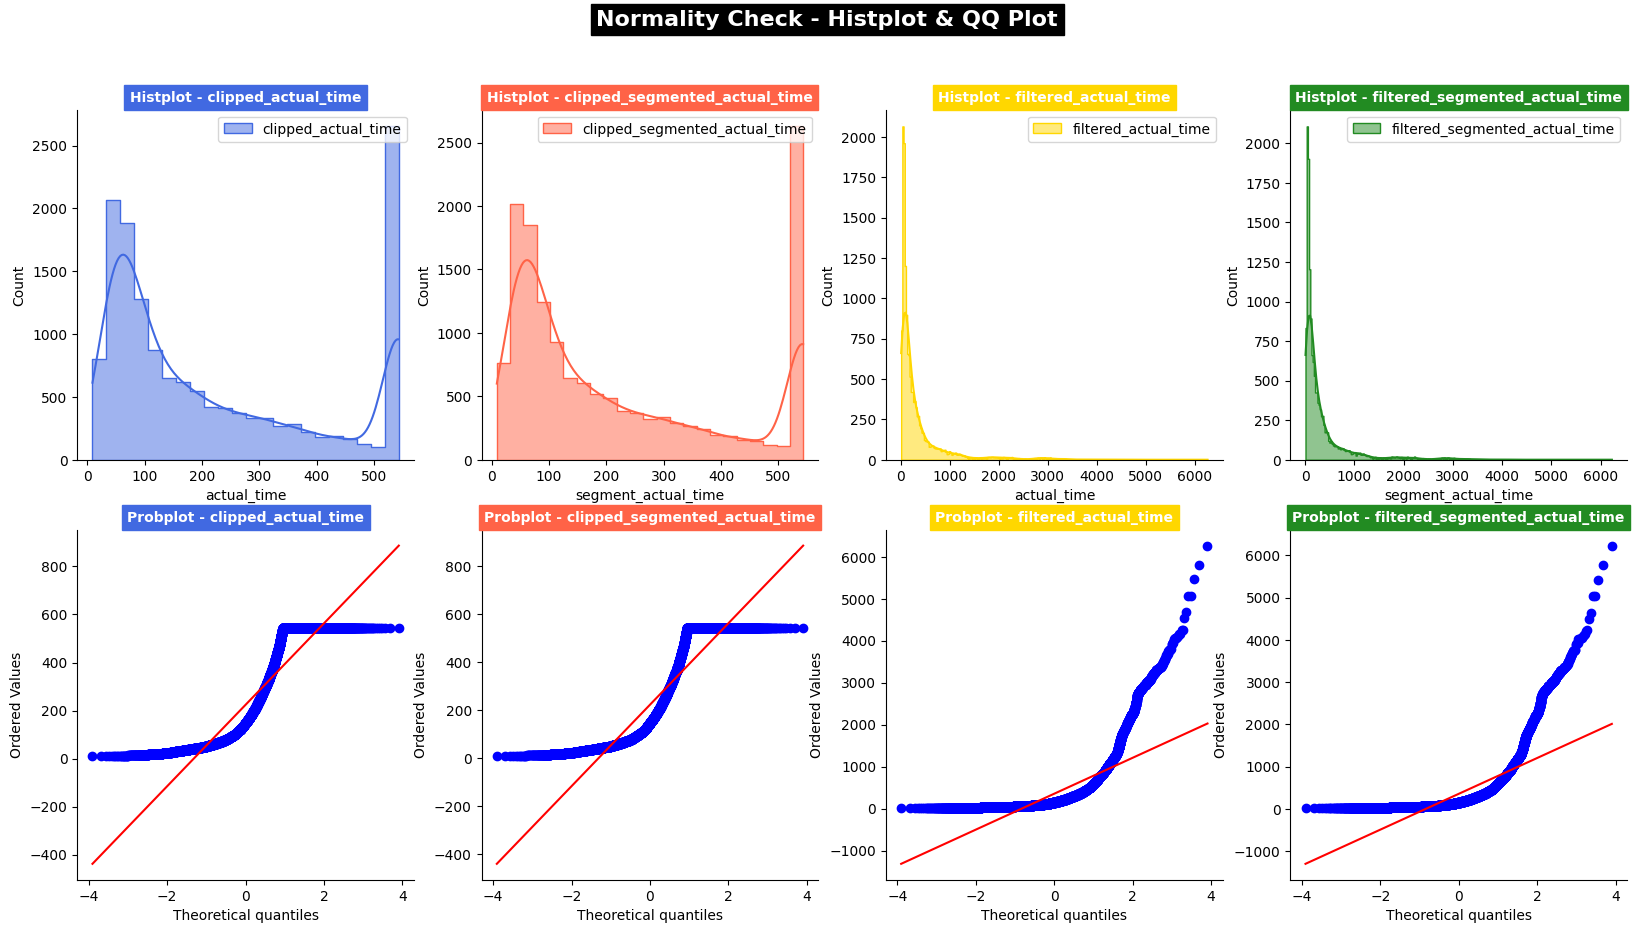

In [ ]:
normality_plots("clipped_actual_time","clipped_segmented_actual_time","filtered_actual_time","filtered_segmented_actual_time",
                clipped_actual_time,clipped_segmented_actual_time,filtered_actual_time,filtered_segmented_actual_time)

In [ ]:
col_names= ["clipped_actual_time","clipped_segmented_actual_time","filtered_actual_time","filtered_segmented_actual_time"]
cols = [clipped_actual_time,clipped_segmented_actual_time,filtered_actual_time,filtered_segmented_actual_time]

for _ in zip(col_names,cols):
    normality = NormalityCheck(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_actual_time' column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian (p-value: 1.1637386759978893e-81)

Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution (statistic: 917.4939591086422)

--------------------------------------------------
Performing BOXCOX transformation on clipped_actual_time column
Best Lambda for clipped_actual_time: 0.10105776555401934

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_actual_time' column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian (p-value: 5.726100581440296e-61)

Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution (statistic: 269.7345488086994)

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_segmented_actual_time' column

Shapiro-Wilk Test
clipped_segmented_actual_time - Data is not Gaussian (p-value: 8.589650748367805e-82)

An

In [ ]:
levene_test("clipped_actual_time","clipped_segmented_actual_time",clipped_actual_time,clipped_segmented_actual_time),
levene_test("filtered_actual_time","filtered_segmented_actual_time",filtered_actual_time,filtered_segmented_actual_time)

Performing Levene Test for clipped_actual_time & clipped_segmented_actual_time

Have Homogeneous (similar) Variance (p-value: 0.7719645875874674)

--------------------------------------------------
Performing Levene Test for filtered_actual_time & filtered_segmented_actual_time

Have Homogeneous (similar) Variance (p-value: 0.6962696403096398)

--------------------------------------------------


In [ ]:
### MannWhitney u Rank test

test_cols = [("clipped_actual_time","clipped_segmented_actual_time",clipped_actual_time,clipped_segmented_actual_time),
       ("filtered_actual_time","filtered_segmented_actual_time",filtered_actual_time,filtered_segmented_actual_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - Mann-Whitney U for clipped_actual_time & clipped_segmented_actual_time
Failed to Reject Null Hypothesis - Accept Ho
There is NO significant difference in the Mean values of clipped_actual_time and clipped_segmented_actual_time
--------------------------------------------------
Performing Non-parametric Test - Mann-Whitney U for filtered_actual_time & filtered_segmented_actual_time
Failed to Reject Null Hypothesis - Accept Ho
There is NO significant difference in the Mean values of filtered_actual_time and filtered_segmented_actual_time
--------------------------------------------------


### **🔍 Insights**

- Data is not Gaussian, but it has similar variance as confirmed by Levene's test.

- The Mann-Whitney U test shows no significant difference in the mean values of Aggregated actual_time and segmented_actual_time.

> * $H_{o}$: $μ_{Aggregated-actual-time}$ = $μ_{Segmented-actual-time}$


### **5.1.3 📏 OSRM Distance vs. Segment OSRM Distance**

In [ ]:
clipped_osrm_distance = clipped_num_df['osrm_distance']
clipped_segmented_osrm_distance = clipped_num_df['segment_osrm_distance']
filtered_osrm_distance = filtered_num_df['osrm_distance']
filtered_segmented_osrm_distance = filtered_num_df['segment_osrm_distance']

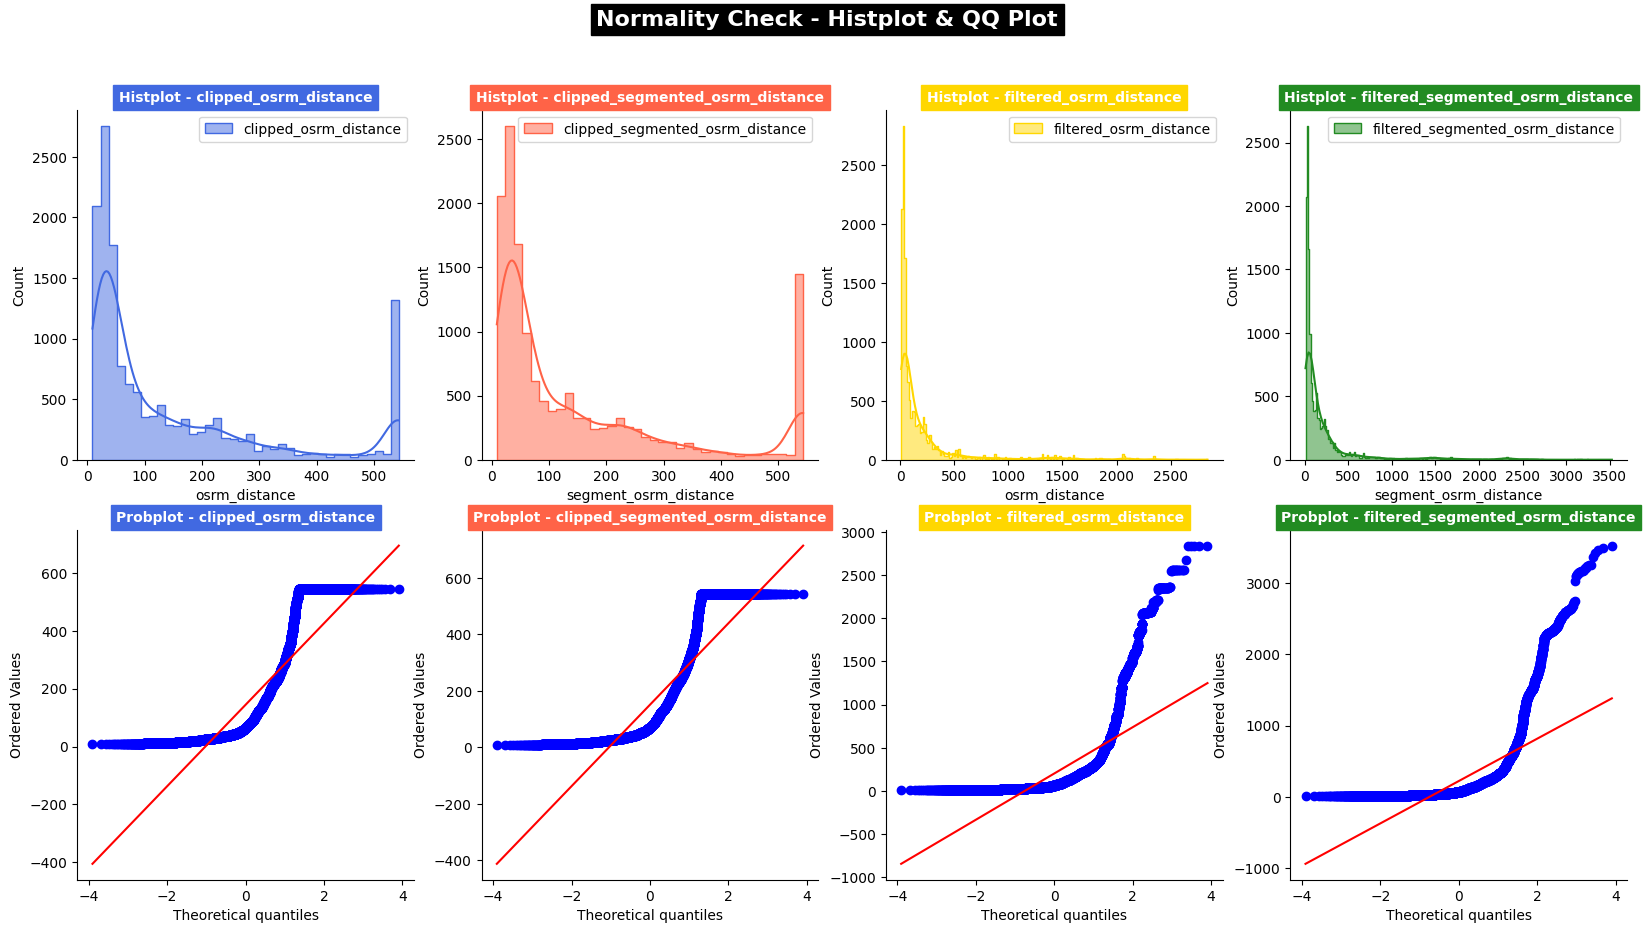

In [ ]:
normality_plots("clipped_osrm_distance","clipped_segmented_osrm_distance","filtered_osrm_distance","filtered_segmented_osrm_distance",
                clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance)

In [ ]:
col_names= ["clipped_osrm_distance","clipped_segmented_osrm_distance","filtered_osrm_distance","filtered_segmented_osrm_distance"]
cols = [clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance]

for _ in zip(col_names,cols):
    normality = NormalityCheck(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_osrm_distance' column

Shapiro-Wilk Test
clipped_osrm_distance - Data is not Gaussian (p-value: 5.29778472086283e-91)

Anderson-Darling Test
clipped_osrm_distance - Data does not follow a normal distribution (statistic: 1389.6926515936138)

--------------------------------------------------
Performing BOXCOX transformation on clipped_osrm_distance column
Best Lambda for clipped_osrm_distance: -0.12884320124441292

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_osrm_distance' column

Shapiro-Wilk Test
clipped_osrm_distance - Data is not Gaussian (p-value: 5.193475604999557e-54)

Anderson-Darling Test
clipped_osrm_distance - Data does not follow a normal distribution (statistic: 176.26432390685295)

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_segmented_osrm_distance' column

Shapiro-Wilk Test
clipped_segmented_osrm_distance - Data is not Gaussian (p-value: 6.873

In [ ]:
levene_test("clipped_osrm_distance","clipped_segmented_osrm_distance",clipped_osrm_distance,clipped_segmented_osrm_distance),
levene_test("filtered_osrm_distance","filtered_segmented_osrm_distance",filtered_osrm_distance,filtered_segmented_osrm_distance)

Performing Levene Test for clipped_osrm_distance & clipped_segmented_osrm_distance

Does not have Homogeneous (different) Variance (p-value: 0.01826790034030855)

--------------------------------------------------
Performing Levene Test for filtered_osrm_distance & filtered_segmented_osrm_distance

Does not have Homogeneous (different) Variance (p-value: 0.00022171118104902091)

--------------------------------------------------


In [ ]:
# MannWhitney u Rank test

test_cols = [("clipped_osrm_distance","clipped_segmented_osrm_distance",clipped_osrm_distance,clipped_segmented_osrm_distance),
       ("filtered_osrm_distance","filtered_segmented_osrm_distance",filtered_osrm_distance,filtered_segmented_osrm_distance)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - Mann-Whitney U for clipped_osrm_distance & clipped_segmented_osrm_distance
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_osrm_distance and clipped_segmented_osrm_distance
--------------------------------------------------
Performing Non-parametric Test - Mann-Whitney U for filtered_osrm_distance & filtered_segmented_osrm_distance
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_osrm_distance and filtered_segmented_osrm_distance
--------------------------------------------------


**Insights:**
- The Mann-Whitney U test confirms a significant difference in the mean values of osrm_distance and segmented_osrm_distance.

> * $H_{o}$: $μ_{Aggregated-osrm-distance}$ != $μ_{Segmented-osrm-distance-aggregated}$


### **5.1.4 🕒 OSRM Time vs. Segment OSRM Time**

In [ ]:
clipped_osrm_time = clipped_num_df['osrm_time']
clipped_segmented_osrm_time = clipped_num_df['segment_osrm_time']
filtered_osrm_time = filtered_num_df['osrm_time']
filtered_segmented_osrm_time = filtered_num_df['segment_osrm_time']

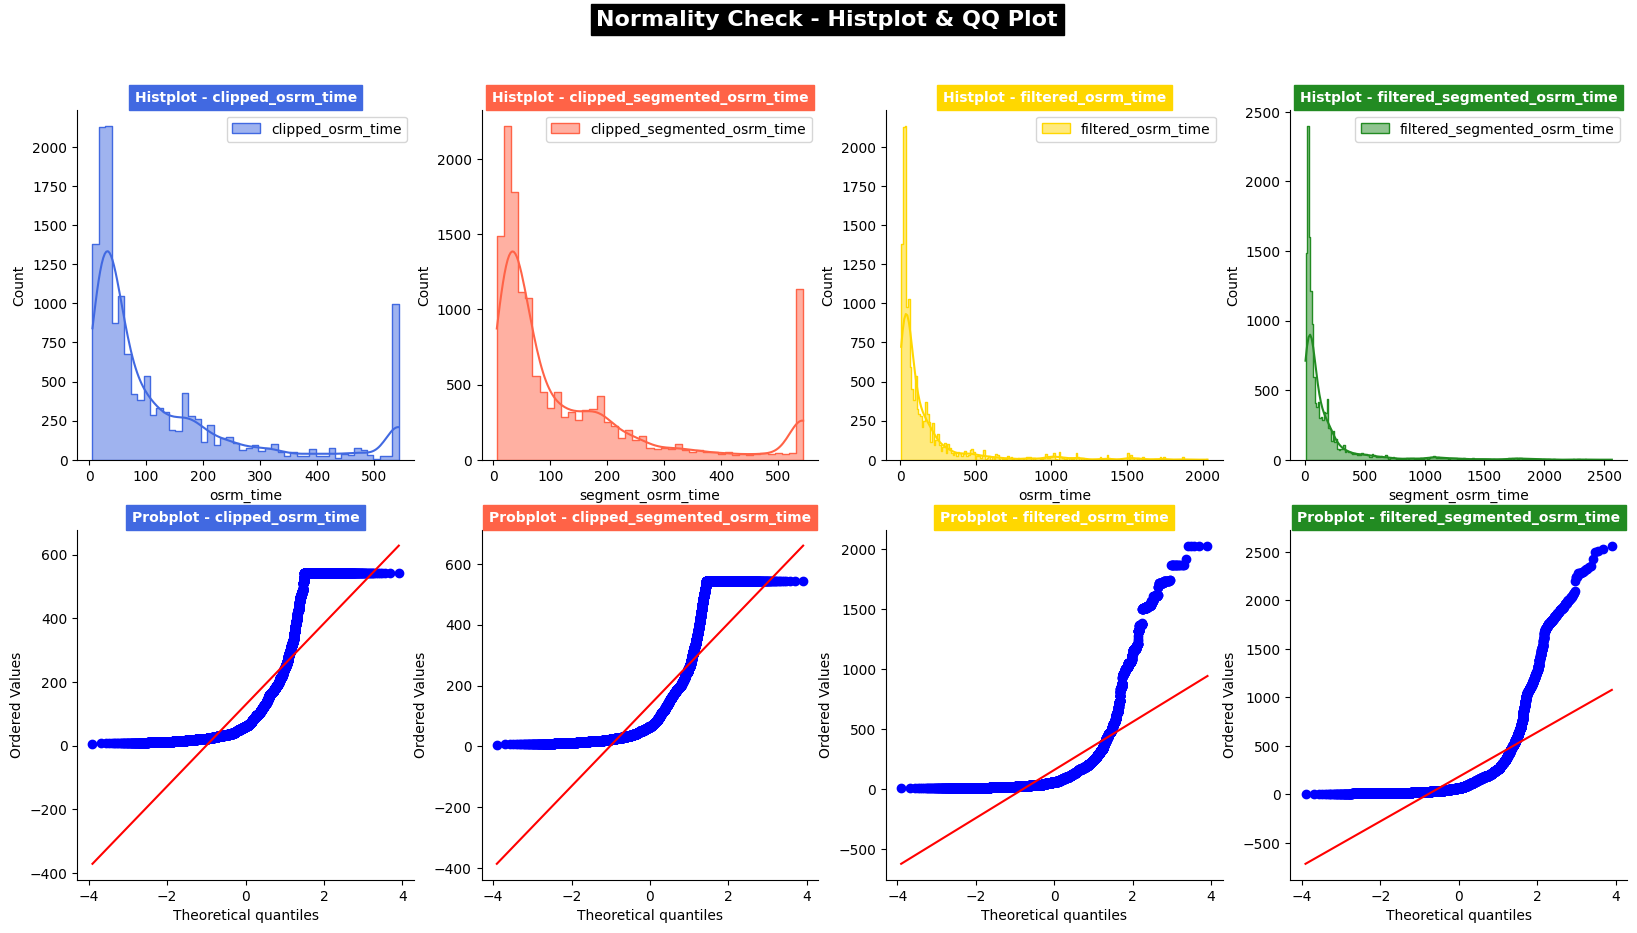

In [ ]:
normality_plots("clipped_osrm_time","clipped_segmented_osrm_time","filtered_osrm_time","filtered_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time)

In [ ]:
col_names= ["clipped_osrm_time","clipped_segmented_osrm_time","filtered_osrm_time","filtered_segmented_osrm_time"]
cols = [clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time]

for _ in zip(col_names,cols):
    normality = NormalityCheck(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_osrm_time' column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian (p-value: 3.5736279564800333e-93)

Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution (statistic: 1482.8624358898087)

--------------------------------------------------
Performing BOXCOX transformation on clipped_osrm_time column
Best Lambda for clipped_osrm_time: -0.14103790389491522

Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_osrm_time' column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian (p-value: 3.8618622532701243e-47)

Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution (statistic: 105.56334428441187)

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for 'clipped_segmented_osrm_time' column

Shapiro-Wilk Test
clipped_segmented_osrm_time - Data is not Gaussian (p-value: 1.3201454353690381e-91)

Anderson-Darling 

In [ ]:
levene_test("clipped_osrm_time","clipped_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time),
levene_test("filtered_osrm_time","filtered_segmented_osrm_time",filtered_osrm_time,filtered_segmented_osrm_time)

Performing Levene Test for clipped_osrm_time & clipped_segmented_osrm_time

Does not have Homogeneous (different) Variance (p-value: 2.7446015225296333e-05)

--------------------------------------------------
Performing Levene Test for filtered_osrm_time & filtered_segmented_osrm_time

Does not have Homogeneous (different) Variance (p-value: 9.250560925676155e-08)

--------------------------------------------------


In [ ]:
# MannWhitney u Rank test

test_cols = [("clipped_osrm_time","clipped_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time),
       ("filtered_osrm_time","filtered_segmented_osrm_time",filtered_osrm_time,filtered_segmented_osrm_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - Mann-Whitney U for clipped_osrm_time & clipped_segmented_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_osrm_time and clipped_segmented_osrm_time
--------------------------------------------------
Performing Non-parametric Test - Mann-Whitney U for filtered_osrm_time & filtered_segmented_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_osrm_time and filtered_segmented_osrm_time
--------------------------------------------------


**🔍 Insight:**

- The Mann-Whitney U test confirms a significant difference in the mean values of **osrm_distance** and **segmented_osrm_distance** aggregated.

> * $H_{o}$: $μ_{Aggregated-osrm-distance}$ != $μ_{Segmented-osrm-distance-aggregated}$

**🔍 Insight:**

1. **Comparison of Aggregated and Segmented Values:**  Hypothesis testing was performed to understand the relationship between the aggregated values of trip-level metrics (actual time, OSRM time, OSRM distance) and their corresponding segmented values. These comparisons offer insights into the consistency and accuracy of segment-level data compared to the overall trip metrics.

2. **Non-Parametric Tests:** Given the non-normal distributions of several features, non-parametric tests like the Mann-Whitney U test and the Wilcoxon signed-rank test were employed. These tests allow for robust comparisons of central tendency without relying on assumptions of normality.

3. **Actual vs. OSRM Time:** The results indicate a statistically significant difference between aggregated actual time and OSRM time. This suggests that the OSRM time estimations may not be entirely accurate in capturing the actual travel time. Further analysis may be warranted to investigate the causes of this discrepancy.

4. **OSRM Distance vs. Segmented OSRM Distance:** The comparison of aggregated OSRM distance and segmented OSRM distance also revealed a significant difference. This suggests that the total OSRM distance for a trip might not be accurately represented by the sum of the individual segment distances. It could be a result of factors like routing inaccuracies or data discrepancies.

5. **Actual Time vs. Segmented Actual Time:** In contrast to the other comparisons, the Mann-Whitney U test did not reveal a significant difference between aggregated actual time and segmented actual time. This suggests that the segmented actual time data might be a reliable measure of the trip's actual time.

These insights from hypothesis testing illuminate the relationship between aggregated and segmented trip-level metrics. They can help in assessing the reliability of the data and guide further investigation on the potential sources of discrepancies between estimated and actual values.


### **For Business Insights**

In [ ]:
# Group by source_state and count the number of orders
orders_by_source = df_trip.groupby('source_state').size().reset_index(name='order_count')

# Find the source state with the most orders
most_orders_source = orders_by_source.loc[orders_by_source['order_count'].idxmax()]

# Display the source state with the most orders
print("Source state with the most orders:")
display(most_orders_source)


# Group by source_state and destination_state to find the busiest corridor
busiest_corridor = df_trip.groupby(['source_state', 'destination_state']).size().reset_index(name='count').nlargest(1, 'count')


# Average distance and time for the busiest corridor
busiest_corridor_details = df_trip.merge(busiest_corridor[['source_state', 'destination_state']], on=['source_state', 'destination_state'], how='inner')
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_time_diff_hour'].mean()

# Display results
print("Busiest corridor:")
display(busiest_corridor)
print("Average distance:", average_distance)
print("Average time (in hours):", average_time)


Source state with the most orders:


,17
source_state,Maharashtra
order_count,2714


Busiest corridor:


,source_state,destination_state,count
85,Maharashtra,Maharashtra,2458


Average distance: 74.852844
Average time (in hours): 5.346577921457034


## 💡<span style="color:red"><strong>Business Insights</strong></span>💡

### <span style="color:dimgrey"><strong>Insights from Exploratory Data Analysis (EDA):</strong></span> 📊

* **🕒 Data Timeframe:** The data spans **26 days**, from **September 12, 2018** to **October 8, 2018**.
* **📈 Trip Distribution:** A notable **88% of trips took place in October**, with the remaining **12% in November**.
* **📉 Data Skewness:** The overall dataset is heavily **right-skewed**.
* **📊 Feature Correlations:** Nearly all features are **strongly correlated** with each other, which aligns with logical expectations.
* **📅 Trip Frequency:** Fewer trips were recorded at the **start and end of the month**, with a slight increase in the **mid-month** period.
* **❓ Missing Trips:** No trips were registered between the **4th and 11th** days of the month, which stands out as unusual.
* **🚚 Mid-Month Surge:** A greater number of trips are observed **mid-month**, indicating that customers tend to place more orders during this period.

### <span style="color:dimgrey"><strong>Route Type Analysis:</strong></span> 🚛

- **🚛 FTL Preference:** **Full Truck Load (FTL)** shipments are more common compared to carting, pointing towards **faster and more efficient deliveries** when FTL is utilized.

### <span style="color:dimgrey"><strong>Geographical Focus:</strong></span> 🌍

Identifying busy routes and managing transportation distances can help optimize **logistics operations** and reduce costs.

* **🌍 Key Source States:** **Haryana, Maharashtra, and Karnataka** are the most active source states, reflecting significant business activity in these regions.
* **🏙️ Busy Source Cities:** **Gurgaon, Bangalore, and Bhiwandi** play critical roles in the business operations, emerging as the most active source cities.
* **📍 Top Destination Cities:** **Gurgaon, Bangalore, and Hyderabad** are the busiest destination cities, highlighting their importance in logistics and transportation.
* **🚚 Busiest Route Corridor:** The route between **Mumbai, Maharashtra** and **Bangalore, Karnataka** is the busiest, with an **average distance of 74.85 km** and an **average travel time of 5.35 hours**.

### <span style="color:dimgrey"><strong>Delivery Time & Distance Accuracy:</strong></span> ⏱️📏

**OSRM Time vs. Actual Time:**

* **🕒 Time Difference:** The **mean actual delivery time** exceeds the **mean OSRM estimated time**, suggesting delays or variations in the actual process.
* **🔄 Optimistic Estimates:** The **OSRM time estimates** are generally shorter than the actual delivery times, indicating that the system tends to provide **optimistic predictions**.

**OSRM Distance vs. Actual Distance:**

* **📏 Distance Difference:** The **mean OSRM distance** is slightly higher than the actual distance, implying that OSRM **overestimates the distance** traveled.
  
**Segment-wise Analysis:**

* **⏳ Time Consistency:** The alignment between the **mean actual time** and **segment actual time** shows **accurate time tracking** across delivery segments.
* **📏 Distance Variability:** The **segment OSRM distance** is higher than the overall distance, suggesting **more conservative estimates** for individual route segments.

### <span style="color:dimgrey"><strong>Actionable Insights:</strong></span> 💡

* **❓ Investigate Missing Trips (4th-11th):** It would be worthwhile to explore why there are no trips between the **4th and 11th** of the month. A **focused effort** to drive orders during this period could help close the gap.
* **🚛 Promote FTL Usage:** With FTL showing **greater efficiency**, consider strategies to **encourage more shipments via FTL** routes.



---

## 🌟 <span style="color:dimgrey"><strong>Business Recommendations</strong></span> 🌟

### <span style="color:salmon"><strong>Route Optimization:</strong></span> 🚚🛣️

   - Given that the busiest state route is within **Karnataka**, it's essential to **optimize the transportation network** within the state. Implementing **route optimization algorithms** and using **real-time traffic monitoring** can enhance efficiency and reduce congestion.
   - Since **Gurgaon** and **Bangalore** are the busiest source and destination cities, city-specific strategies to manage the **high traffic volume** should be prioritized, ensuring smooth transportation and logistics operations.

### <span style="color:salmon"><strong>Operational Efficiency:</strong></span> ⚙️📊

   - With **OSRM estimated time** being shorter than the **actual delivery time**, businesses should adjust their **customer delivery time expectations** to be more realistic and avoid disappointment.
   - The **OSRM estimated distance** is greater than the **actual distance** traveled. This insight can help businesses adjust their **distance estimations** to enhance the accuracy of their logistics planning.
   - Noting that **segment OSRM distance** exceeds overall OSRM distance, businesses can use these discrepancies to fine-tune **segment-specific route planning**, improving logistics precision.
   - Leveraging **advanced demand forecasting techniques** can help businesses anticipate **peak traffic periods**, allowing better **resource allocation** and minimizing congestion-related delays.
   - The analysis points to key areas for operational improvement. By refining **route planning algorithms**, addressing discrepancies in **estimated vs. actual data**, and improving processes across **different delivery stages**, businesses can significantly enhance **overall operational efficiency**.

### <span style="color:salmon"><strong>Customer Satisfaction:</strong></span> 😊📦

   - Ensuring **accurate delivery time estimates** will lead to better **customer satisfaction** by aligning expectations with real-world outcomes.
   - Increasing the use of **FTL shipments**, which are faster, can significantly impact **customer satisfaction**. Customers value timely deliveries, and optimizing **FTL** routes supports this expectation by reducing delivery times.

### <span style="color:salmon"><strong>Customer Profiling:</strong></span> 📋🔍

   - A detailed **customer profiling** of those in **Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh** is necessary to understand why major orders come from these states. This can help in **enhancing customer experiences** and improving both their **buying** and **delivery journey**.

### <span style="color:salmon"><strong>Cost Optimization:</strong></span> 💰📉

   - The insights into **estimated vs. actual times and distances** can support **cost optimization** strategies. Accurate logistics planning can lead to **better resource management** and reduce overall operational costs.
   - Fine-tuning these processes will result in **better budget allocation** and more efficient use of resources across the supply chain.

### <span style="color:salmon"><strong>Strategic Decision-making:</strong></span> 🧠📈

   - The preference for **FTL over carting** highlights a **strategic move** by logistics management. Continuously evaluating the benefits of this decision will support **long-term strategic planning**, ensuring that evolving business needs are met efficiently.

### <span style="color:salmon"><strong>Collaboration with Stakeholders:</strong></span> 🤝🚦

   - Collaborating with key stakeholders—including **government authorities**, **transportation companies**, and **local communities**—can help businesses develop and implement **comprehensive strategies** for managing transportation in busy corridors and cities, enhancing logistics operations for all parties involved.

---
